In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis, pearson3
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt
import pypfopt
from pypfopt import risk_models, plotting, expected_returns
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

In [2]:
def stock_take(ticker):
    stock_data = yf.Ticker(ticker).history(period='10y')
    #stock_data['Returns'] = stock_data['Close'].pct_change()
    stock_data['Returns'] = stock_data['Close'].resample('M').ffill().pct_change()
    final=stock_data.dropna()
    return final




def simulated(data):
    returns=np.array(data['Returns'])
    mean = np.mean(returns)
    std_dev = np.std(returns)
    skewness = skew(returns)
    kurt = kurtosis(returns) + 3
    num_simulations=100000
    simulated_returns = pearson3.rvs(skewness, loc = mean, scale = std_dev, size = num_simulations)
    result = minimize_scalar(negative_growth_rate, bounds=(0,24), args = (simulated_returns,), method = 'bounded')
    optimal_leverage = result.x
    return simulated_returns, optimal_leverage




def growth_rate(f, returns):
    array=np.log(1+f*returns)
    #array[np.isnan(array)] = 0
    array=array[~np.isnan(array)]
    return np.mean(array)




def negative_growth_rate(f, returns):
    return -growth_rate(f,returns)




def plot_growth(simulated_returns, optimal_leverage, ticker):
    leverage_values = np.linspace(0, 24, 500)
    growth_rates = [growth_rate(f, simulated_returns) for f in leverage_values]

    plt.figure(figsize=(10,6))
    plt.plot(leverage_values, growth_rates, label = 'Growth Rate')
    plt.axvline(optimal_leverage, color = 'r', linestyle = '--', label = f'Optimal leverage: {optimal_leverage}')
    plt.xlabel('Leverage')
    plt.ylabel('Growth Rate')
    plt.title(f'Growth Rate vs Leverage: {ticker}')
    plt.legend()
    plt.grid(True)
    plt.show()

C:\Users\a-spyrosploussiou\AppData\Local\Temp\145\ipykernel_21652\4226197624.py:27: RuntimeWarning: invalid value encountered in log
  array=np.log(1+f*returns)


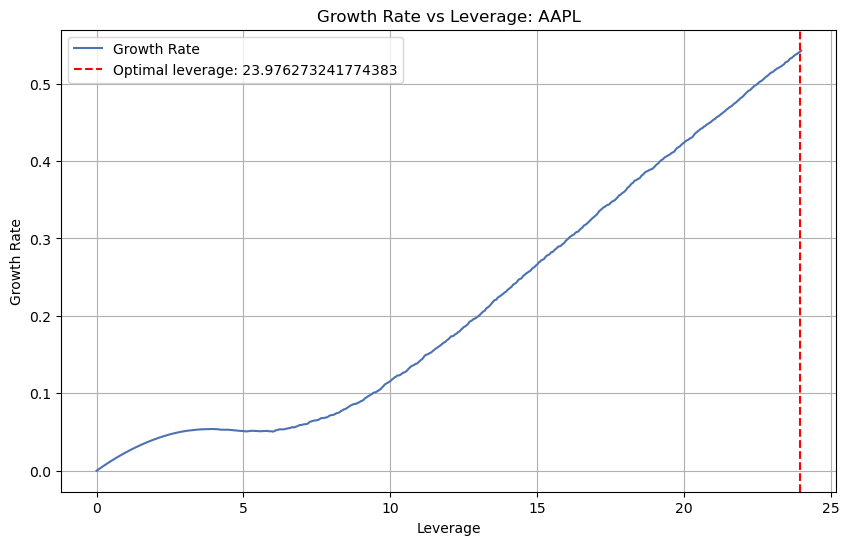

C:\Users\a-spyrosploussiou\AppData\Local\Temp\145\ipykernel_21652\4226197624.py:27: RuntimeWarning: invalid value encountered in log
  array=np.log(1+f*returns)


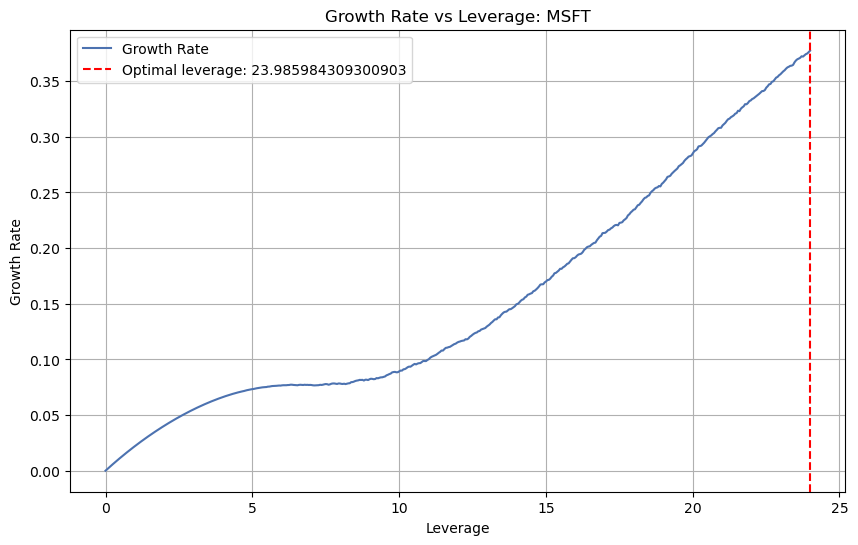

C:\Users\a-spyrosploussiou\AppData\Local\Temp\145\ipykernel_21652\4226197624.py:27: RuntimeWarning: invalid value encountered in log
  array=np.log(1+f*returns)


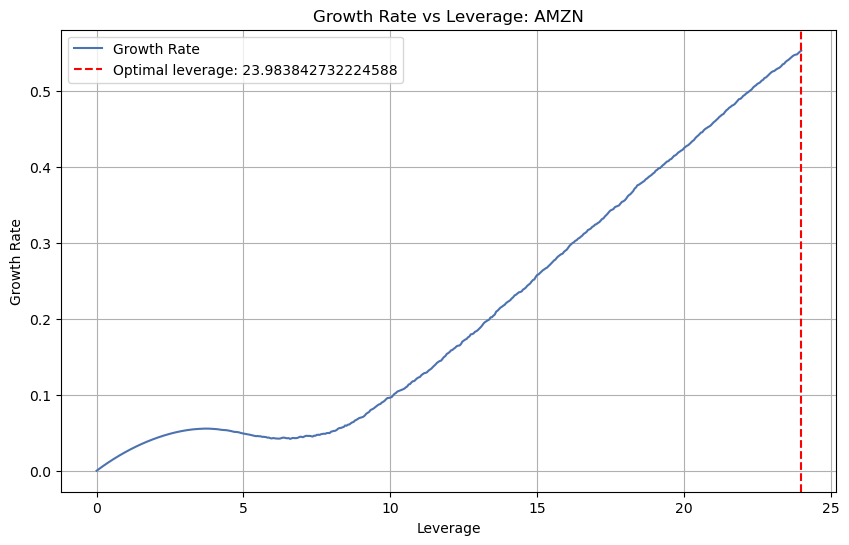

C:\Users\a-spyrosploussiou\AppData\Local\Temp\145\ipykernel_21652\4226197624.py:27: RuntimeWarning: invalid value encountered in log
  array=np.log(1+f*returns)


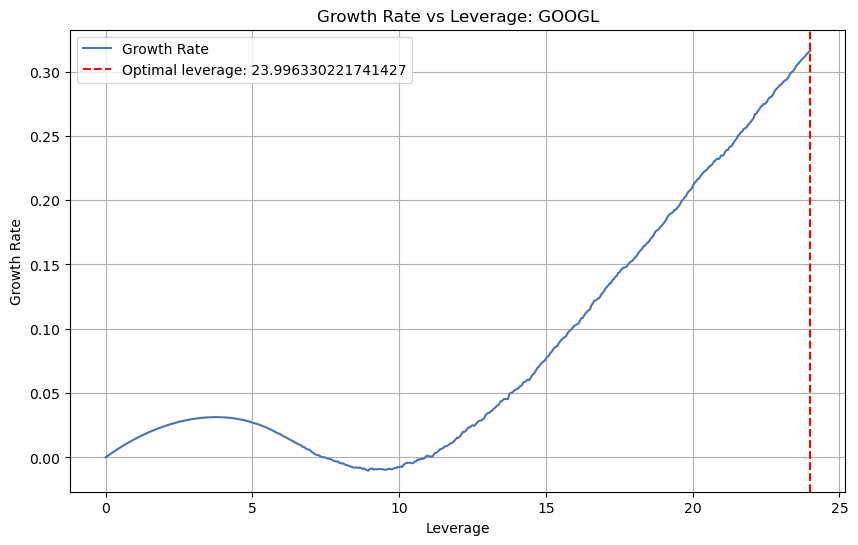

C:\Users\a-spyrosploussiou\AppData\Local\Temp\145\ipykernel_21652\4226197624.py:27: RuntimeWarning: invalid value encountered in log
  array=np.log(1+f*returns)


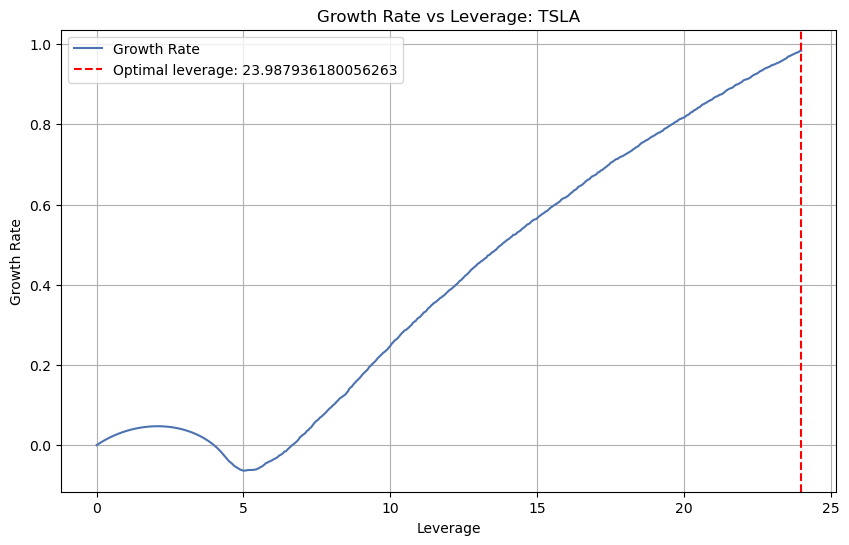

C:\Users\a-spyrosploussiou\AppData\Local\Temp\145\ipykernel_21652\4226197624.py:27: RuntimeWarning: invalid value encountered in log
  array=np.log(1+f*returns)


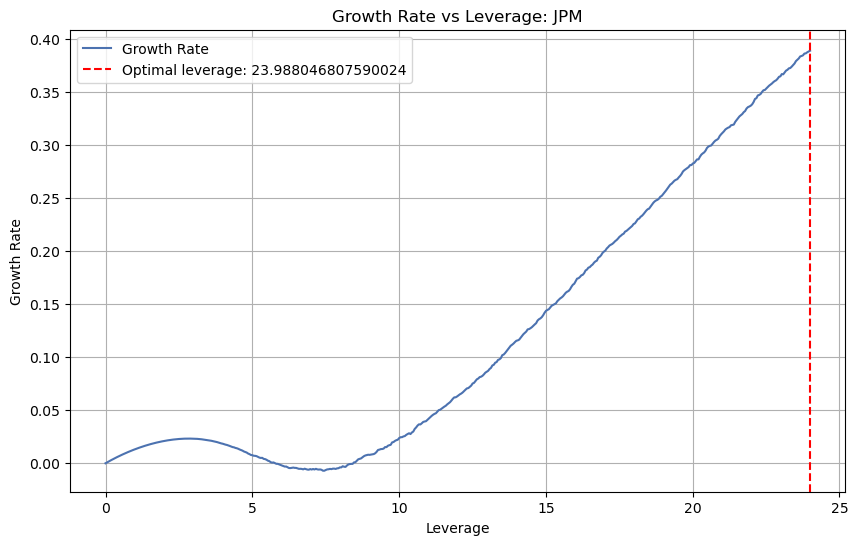

C:\Users\a-spyrosploussiou\AppData\Local\Temp\145\ipykernel_21652\4226197624.py:27: RuntimeWarning: invalid value encountered in log
  array=np.log(1+f*returns)


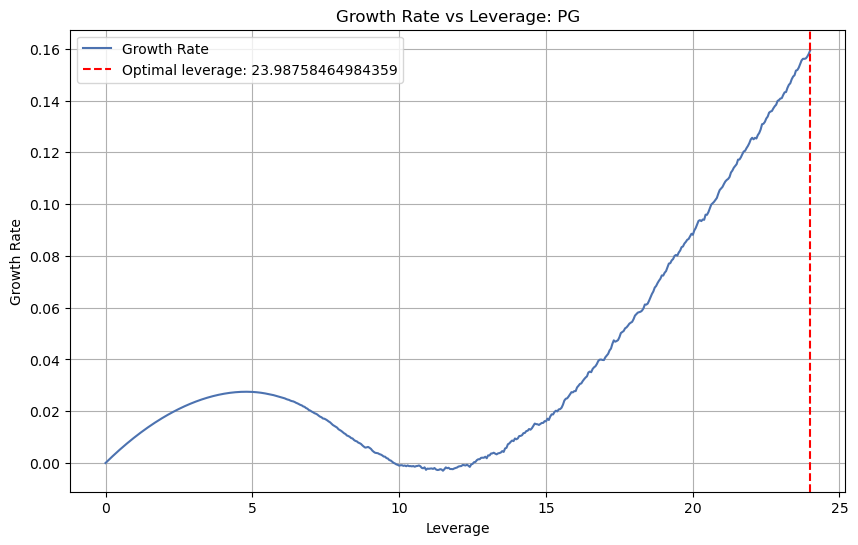

C:\Users\a-spyrosploussiou\AppData\Local\Temp\145\ipykernel_21652\4226197624.py:27: RuntimeWarning: invalid value encountered in log
  array=np.log(1+f*returns)


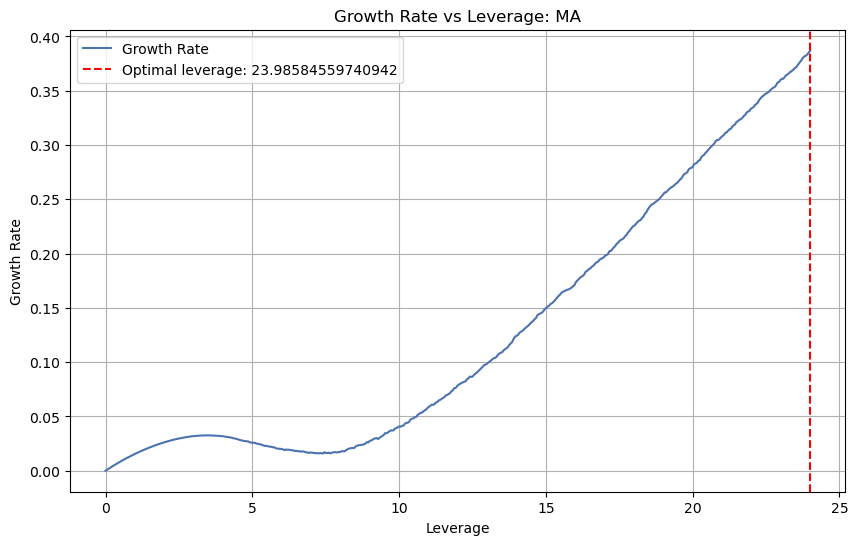

C:\Users\a-spyrosploussiou\AppData\Local\Temp\145\ipykernel_21652\4226197624.py:27: RuntimeWarning: invalid value encountered in log
  array=np.log(1+f*returns)


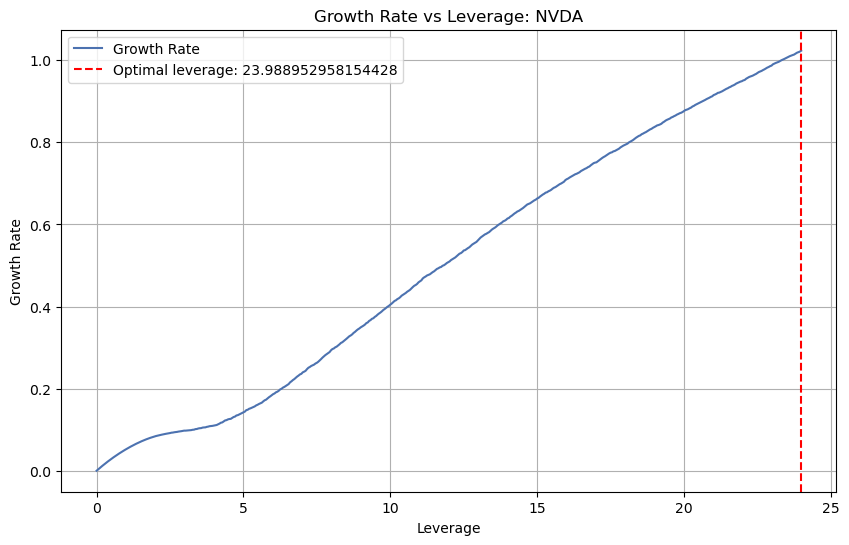

C:\Users\a-spyrosploussiou\AppData\Local\Temp\145\ipykernel_21652\4226197624.py:27: RuntimeWarning: invalid value encountered in log
  array=np.log(1+f*returns)


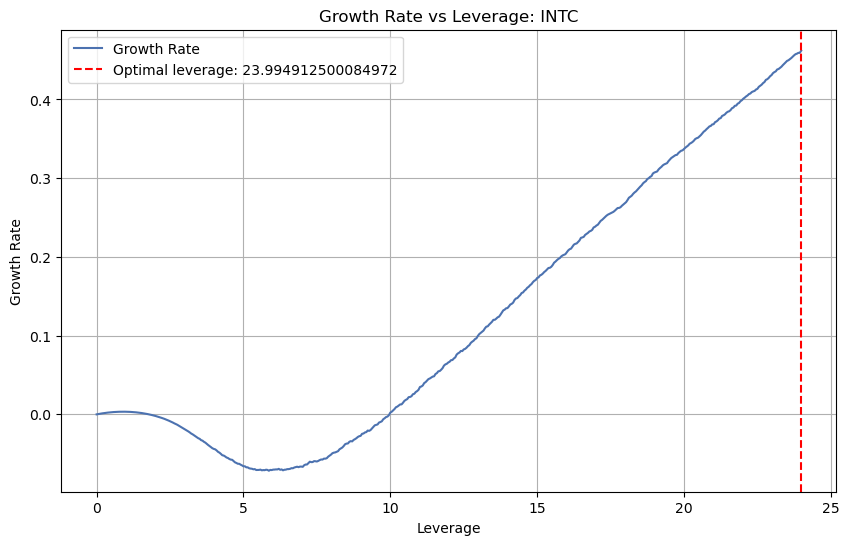

C:\Users\a-spyrosploussiou\AppData\Local\Temp\145\ipykernel_21652\4226197624.py:27: RuntimeWarning: invalid value encountered in log
  array=np.log(1+f*returns)


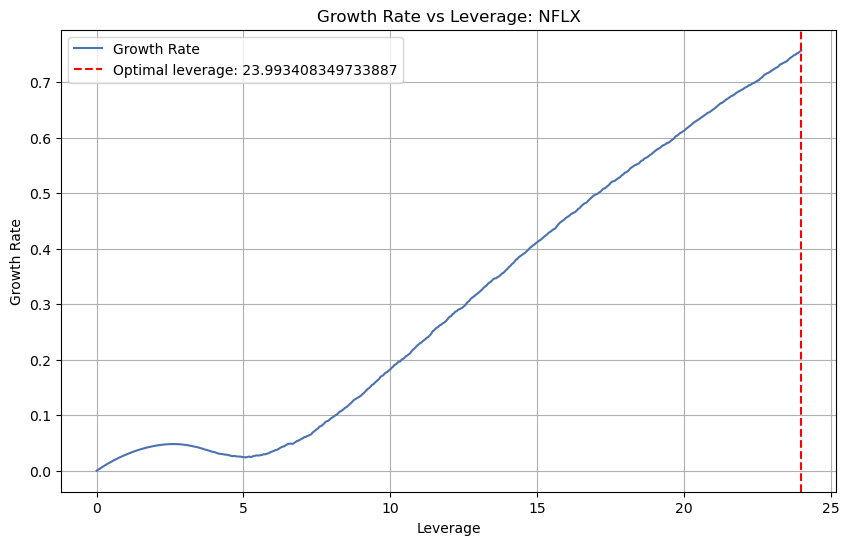

C:\Users\a-spyrosploussiou\AppData\Local\Temp\145\ipykernel_21652\4226197624.py:27: RuntimeWarning: invalid value encountered in log
  array=np.log(1+f*returns)


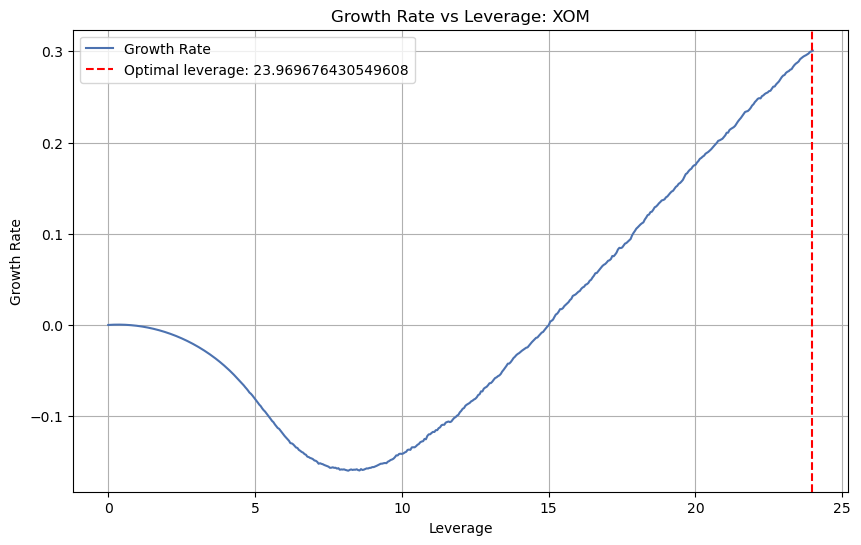

C:\Users\a-spyrosploussiou\AppData\Local\Temp\145\ipykernel_21652\4226197624.py:27: RuntimeWarning: invalid value encountered in log
  array=np.log(1+f*returns)


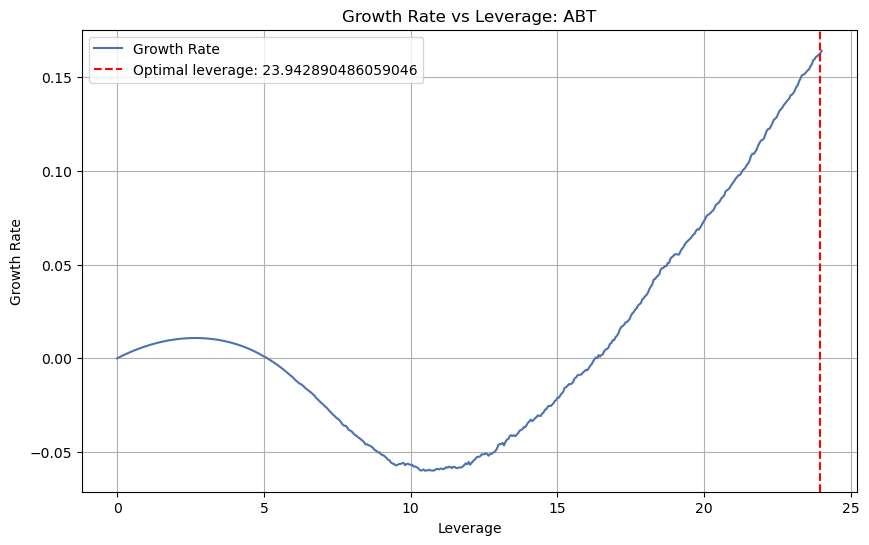

C:\Users\a-spyrosploussiou\AppData\Local\Temp\145\ipykernel_21652\4226197624.py:27: RuntimeWarning: invalid value encountered in log
  array=np.log(1+f*returns)


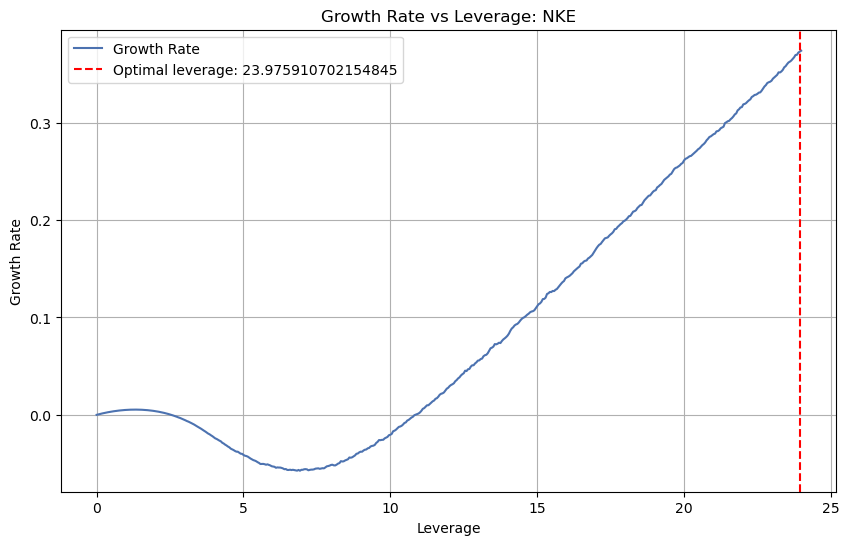

C:\Users\a-spyrosploussiou\AppData\Local\Temp\145\ipykernel_21652\4226197624.py:27: RuntimeWarning: invalid value encountered in log
  array=np.log(1+f*returns)


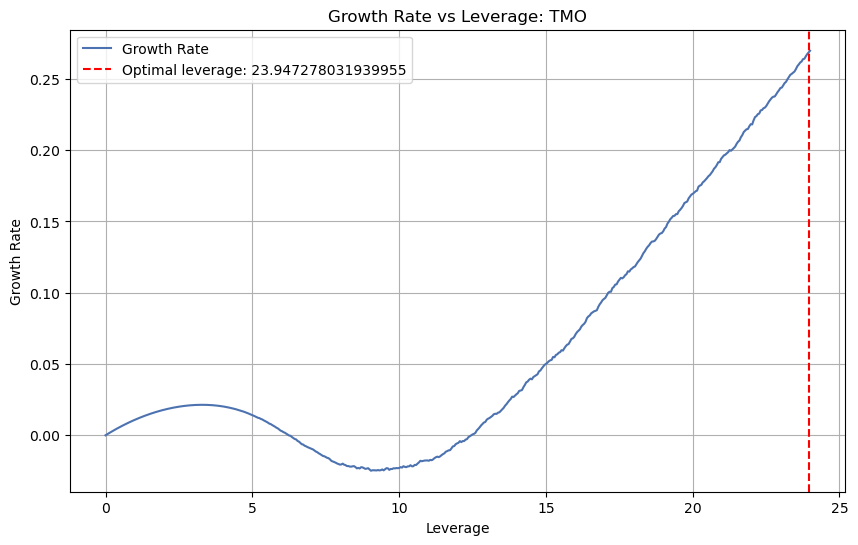

C:\Users\a-spyrosploussiou\AppData\Local\Temp\145\ipykernel_21652\4226197624.py:27: RuntimeWarning: invalid value encountered in log
  array=np.log(1+f*returns)


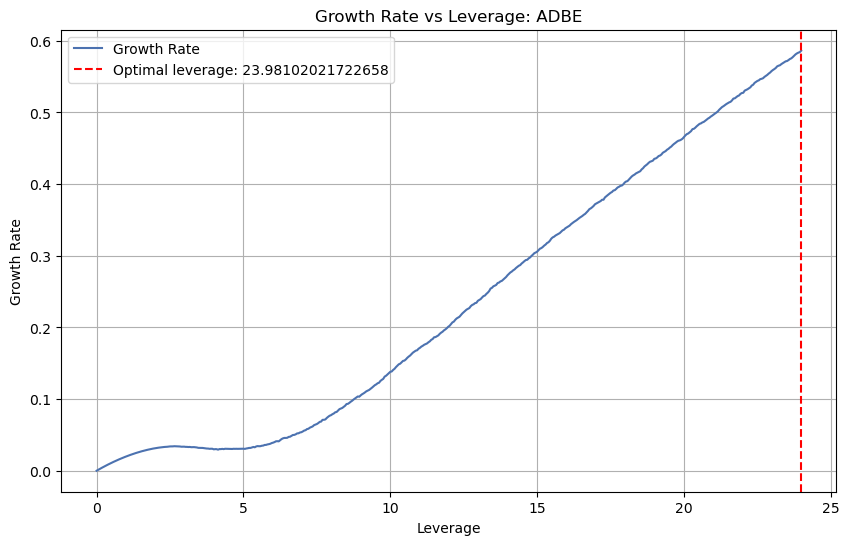

C:\Users\a-spyrosploussiou\AppData\Local\Temp\145\ipykernel_21652\4226197624.py:27: RuntimeWarning: invalid value encountered in log
  array=np.log(1+f*returns)


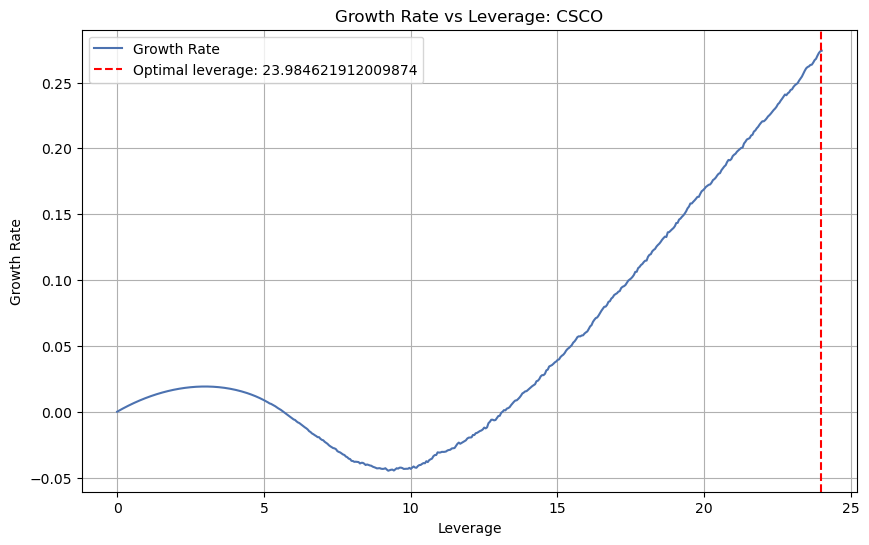

C:\Users\a-spyrosploussiou\AppData\Local\Temp\145\ipykernel_21652\4226197624.py:27: RuntimeWarning: invalid value encountered in log
  array=np.log(1+f*returns)


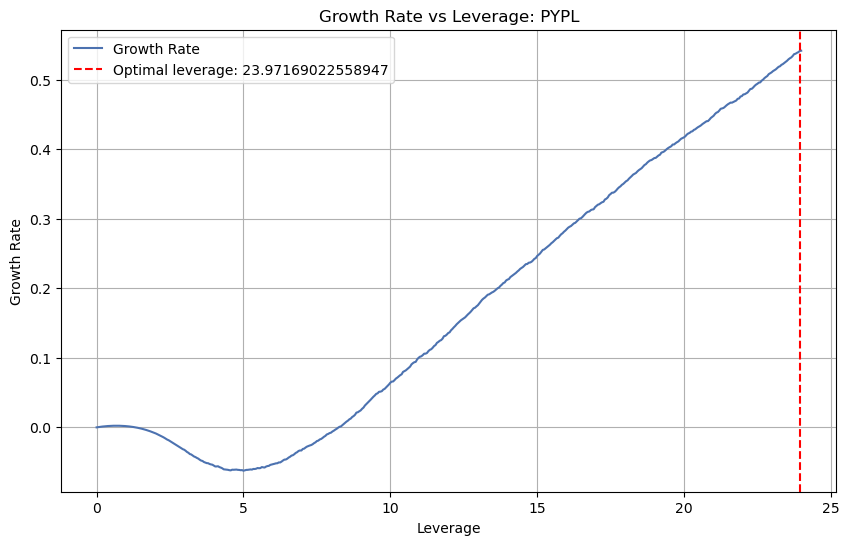

C:\Users\a-spyrosploussiou\AppData\Local\Temp\145\ipykernel_21652\4226197624.py:27: RuntimeWarning: invalid value encountered in log
  array=np.log(1+f*returns)


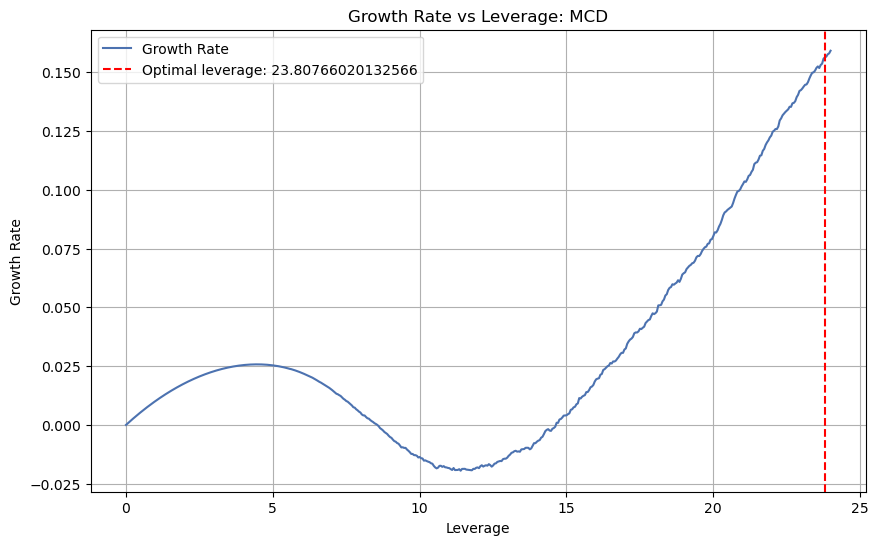

C:\Users\a-spyrosploussiou\AppData\Local\Temp\145\ipykernel_21652\4226197624.py:27: RuntimeWarning: invalid value encountered in log
  array=np.log(1+f*returns)


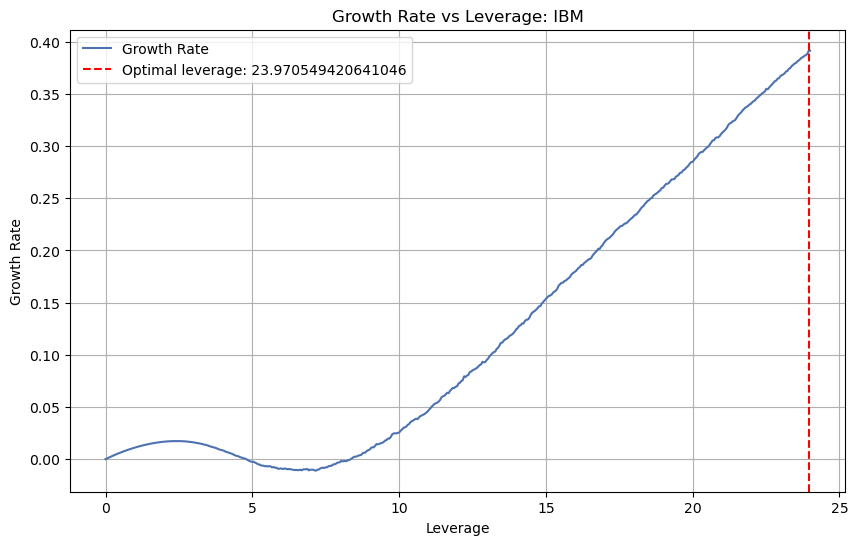

C:\Users\a-spyrosploussiou\AppData\Local\Temp\145\ipykernel_21652\4226197624.py:27: RuntimeWarning: invalid value encountered in log
  array=np.log(1+f*returns)


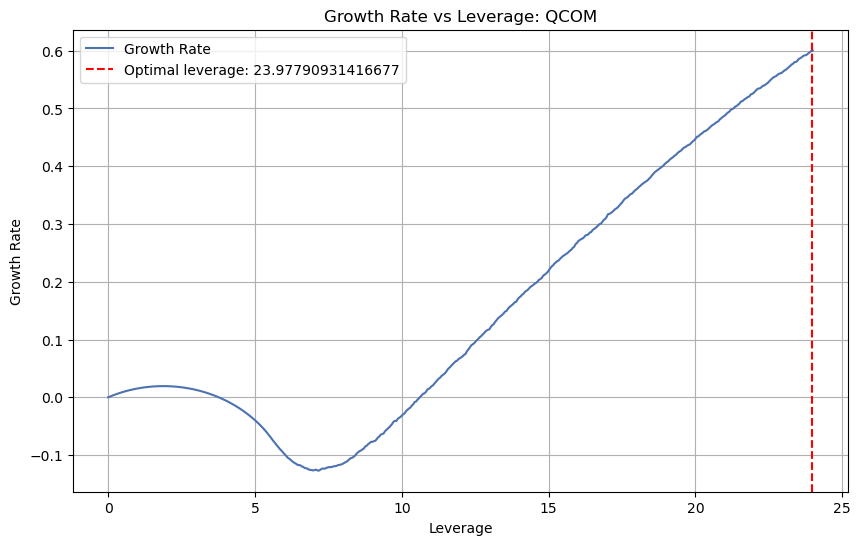

C:\Users\a-spyrosploussiou\AppData\Local\Temp\145\ipykernel_21652\4226197624.py:27: RuntimeWarning: invalid value encountered in log
  array=np.log(1+f*returns)


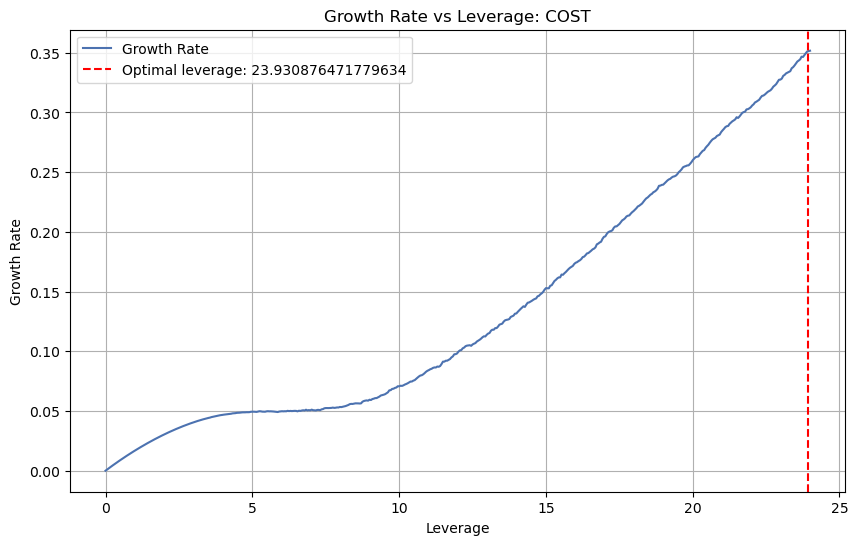

C:\Users\a-spyrosploussiou\AppData\Local\Temp\145\ipykernel_21652\4226197624.py:27: RuntimeWarning: invalid value encountered in log
  array=np.log(1+f*returns)


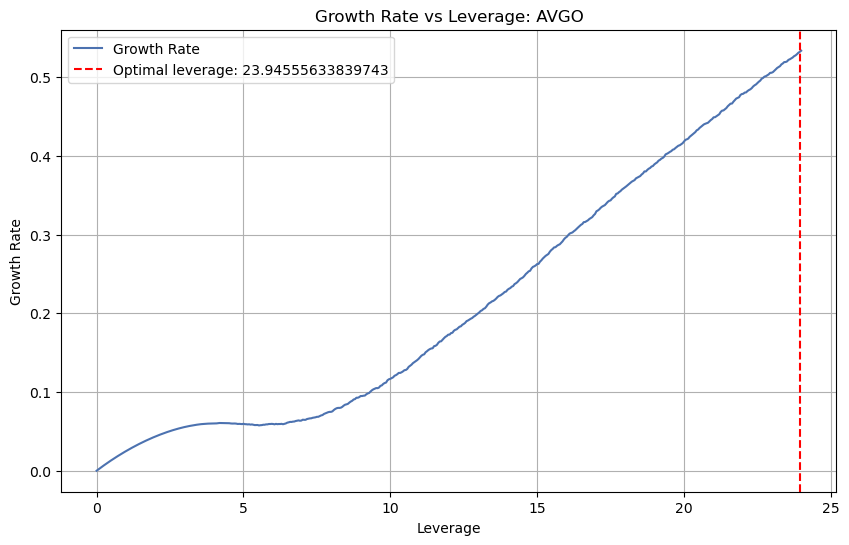

C:\Users\a-spyrosploussiou\AppData\Local\Temp\145\ipykernel_21652\4226197624.py:27: RuntimeWarning: invalid value encountered in log
  array=np.log(1+f*returns)


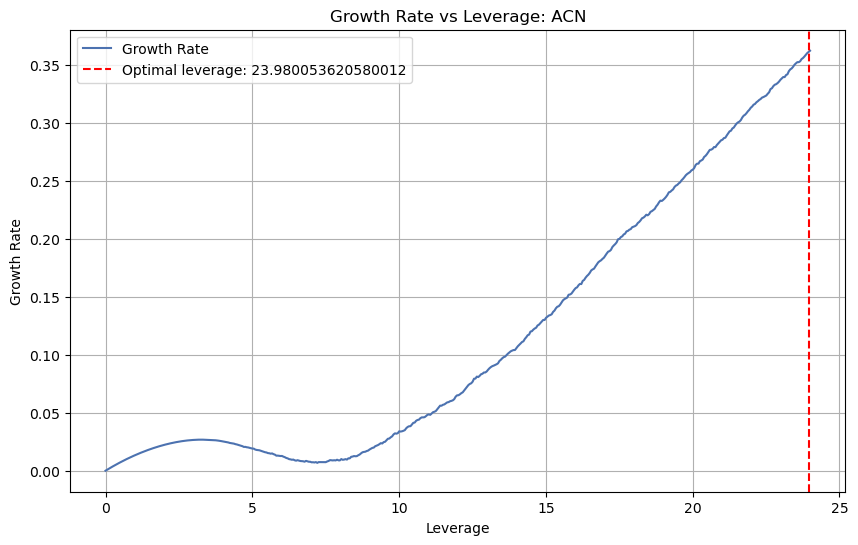

C:\Users\a-spyrosploussiou\AppData\Local\Temp\145\ipykernel_21652\4226197624.py:27: RuntimeWarning: invalid value encountered in log
  array=np.log(1+f*returns)


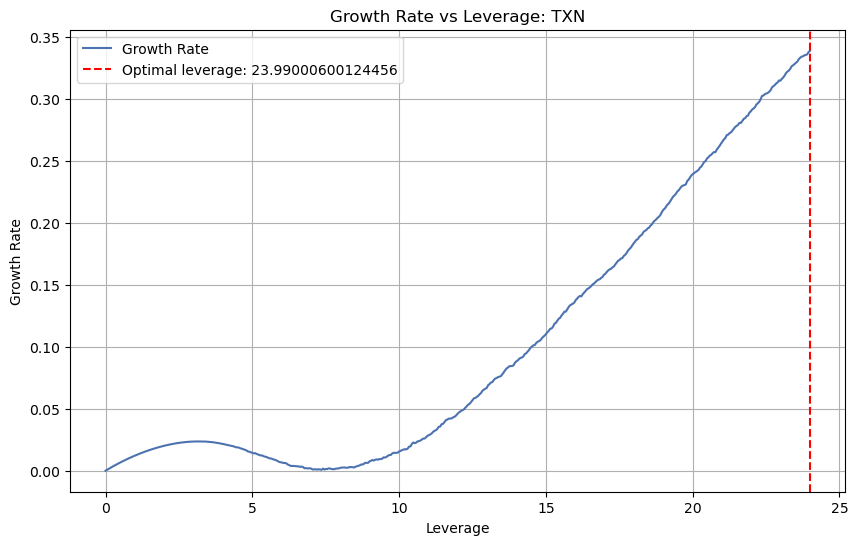

C:\Users\a-spyrosploussiou\AppData\Local\Temp\145\ipykernel_21652\4226197624.py:27: RuntimeWarning: invalid value encountered in log
  array=np.log(1+f*returns)


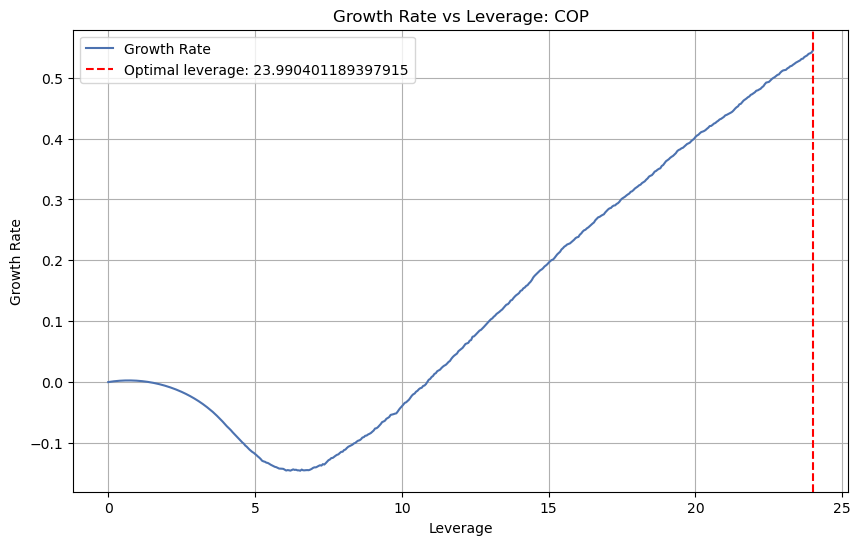

C:\Users\a-spyrosploussiou\AppData\Local\Temp\145\ipykernel_21652\4226197624.py:27: RuntimeWarning: invalid value encountered in log
  array=np.log(1+f*returns)


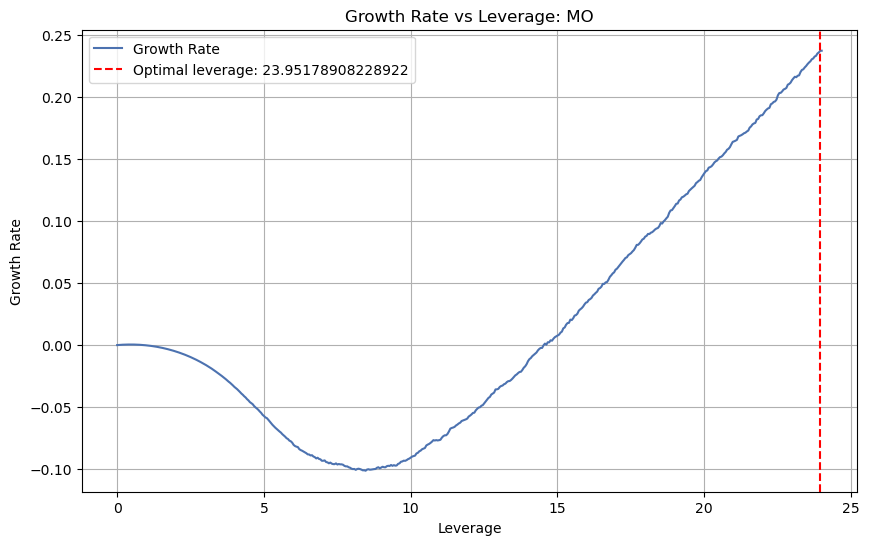

C:\Users\a-spyrosploussiou\AppData\Local\Temp\145\ipykernel_21652\4226197624.py:27: RuntimeWarning: invalid value encountered in log
  array=np.log(1+f*returns)


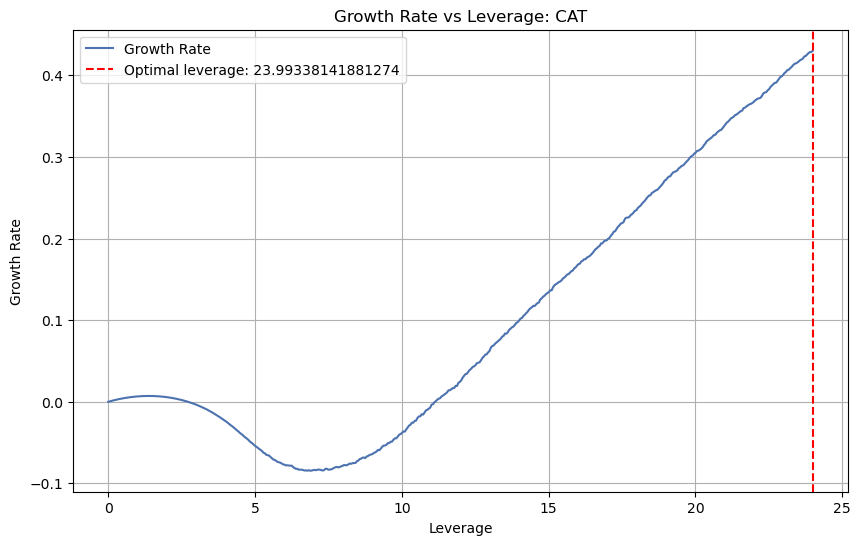

C:\Users\a-spyrosploussiou\AppData\Local\Temp\145\ipykernel_21652\4226197624.py:27: RuntimeWarning: invalid value encountered in log
  array=np.log(1+f*returns)


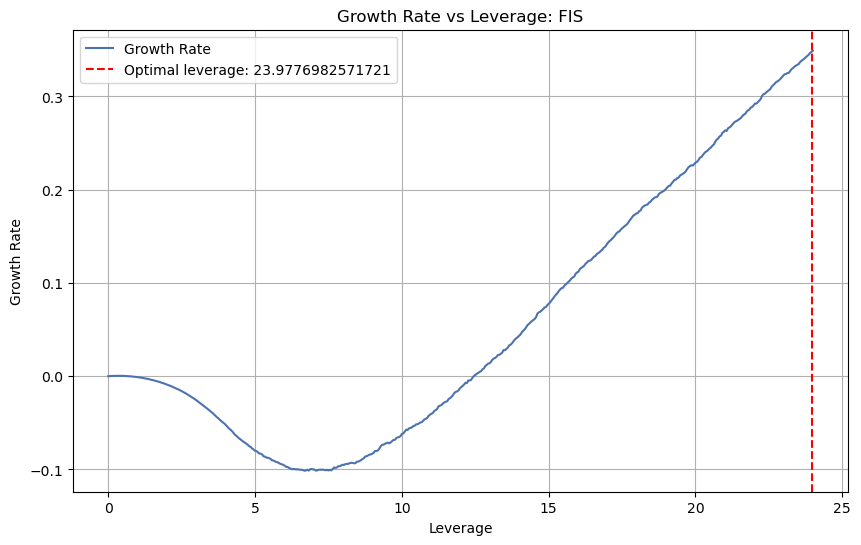

C:\Users\a-spyrosploussiou\AppData\Local\Temp\145\ipykernel_21652\4226197624.py:27: RuntimeWarning: invalid value encountered in log
  array=np.log(1+f*returns)


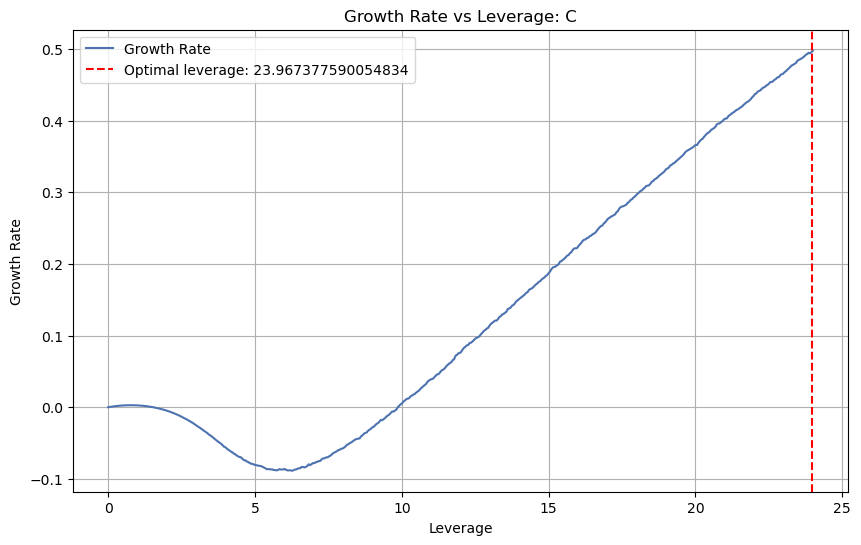

C:\Users\a-spyrosploussiou\AppData\Local\Temp\145\ipykernel_21652\4226197624.py:27: RuntimeWarning: invalid value encountered in log
  array=np.log(1+f*returns)


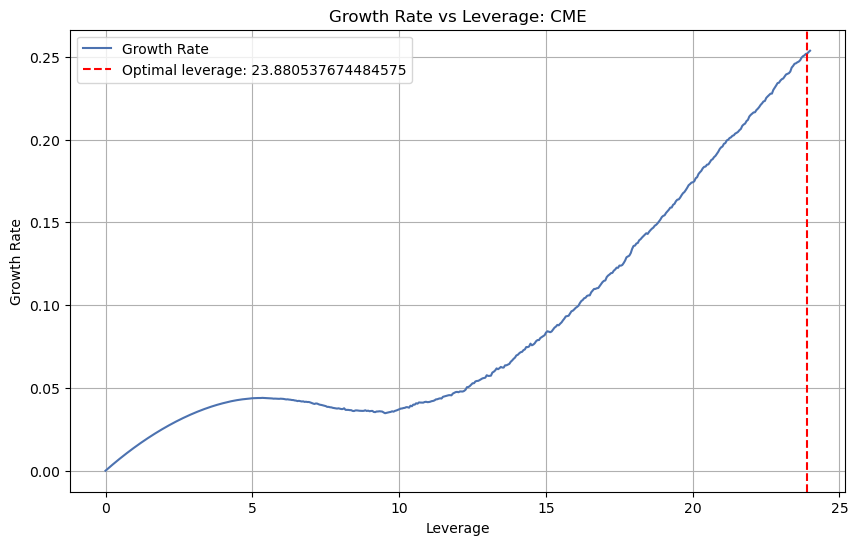

C:\Users\a-spyrosploussiou\AppData\Local\Temp\145\ipykernel_21652\4226197624.py:27: RuntimeWarning: invalid value encountered in log
  array=np.log(1+f*returns)


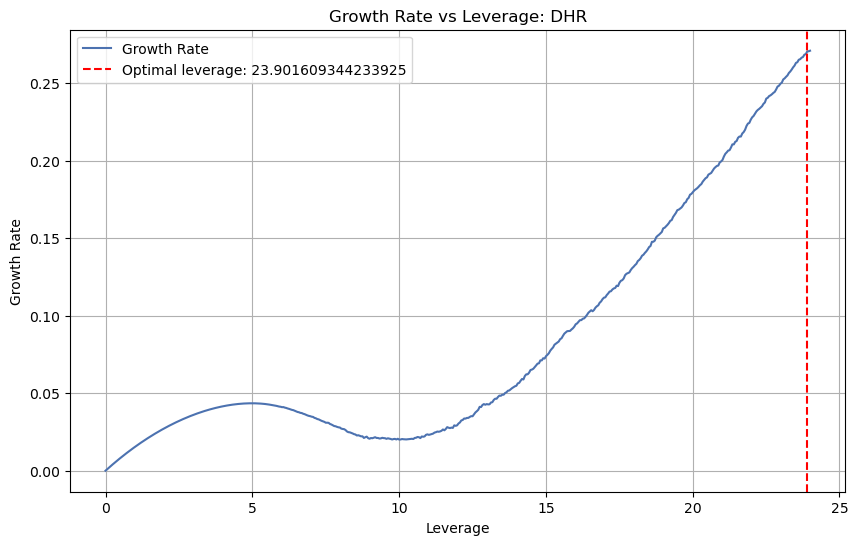

C:\Users\a-spyrosploussiou\AppData\Local\Temp\145\ipykernel_21652\4226197624.py:27: RuntimeWarning: invalid value encountered in log
  array=np.log(1+f*returns)


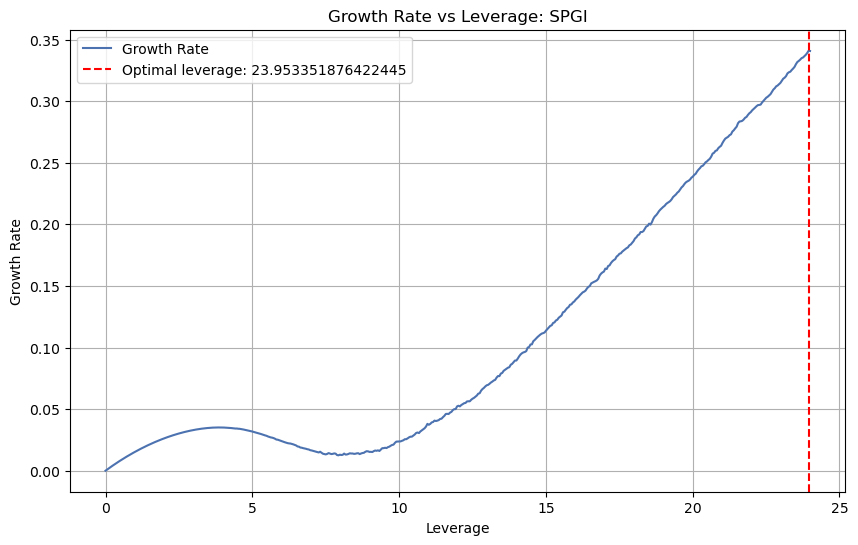

C:\Users\a-spyrosploussiou\AppData\Local\Temp\145\ipykernel_21652\4226197624.py:27: RuntimeWarning: invalid value encountered in log
  array=np.log(1+f*returns)


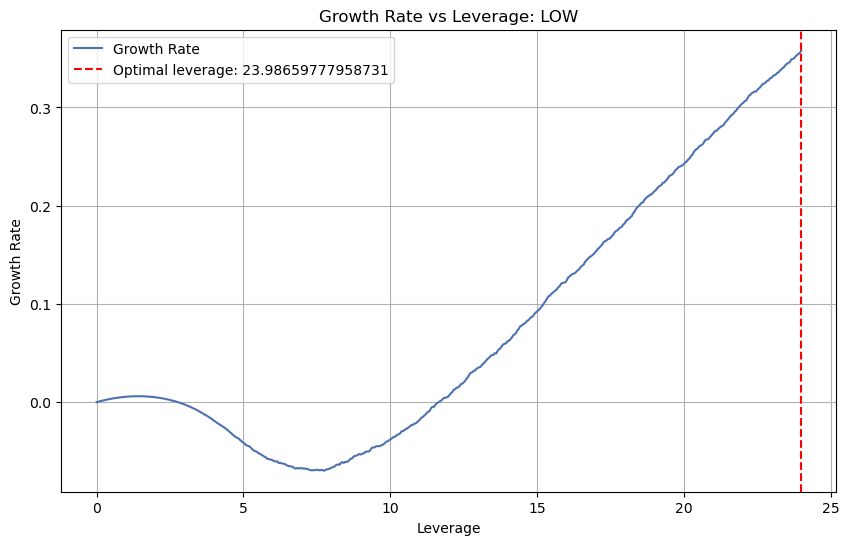

C:\Users\a-spyrosploussiou\AppData\Local\Temp\145\ipykernel_21652\4226197624.py:27: RuntimeWarning: invalid value encountered in log
  array=np.log(1+f*returns)


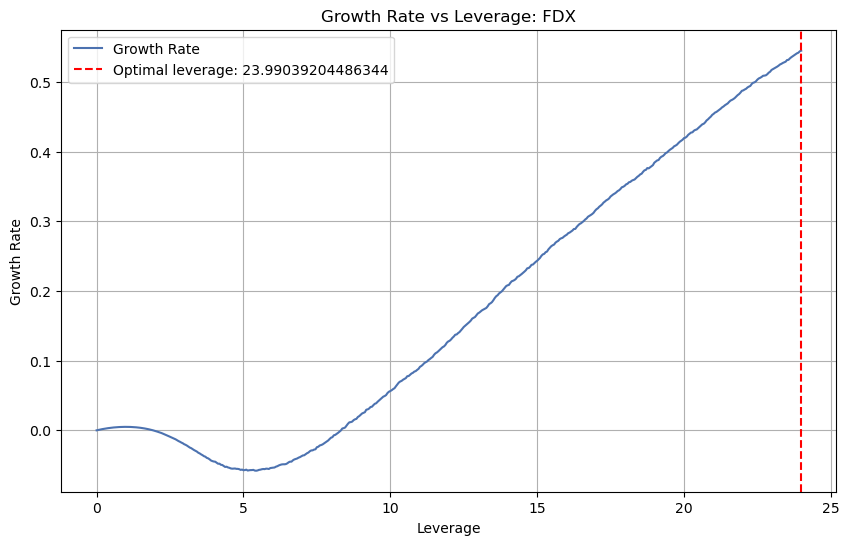

C:\Users\a-spyrosploussiou\AppData\Local\Temp\145\ipykernel_21652\4226197624.py:27: RuntimeWarning: invalid value encountered in log
  array=np.log(1+f*returns)


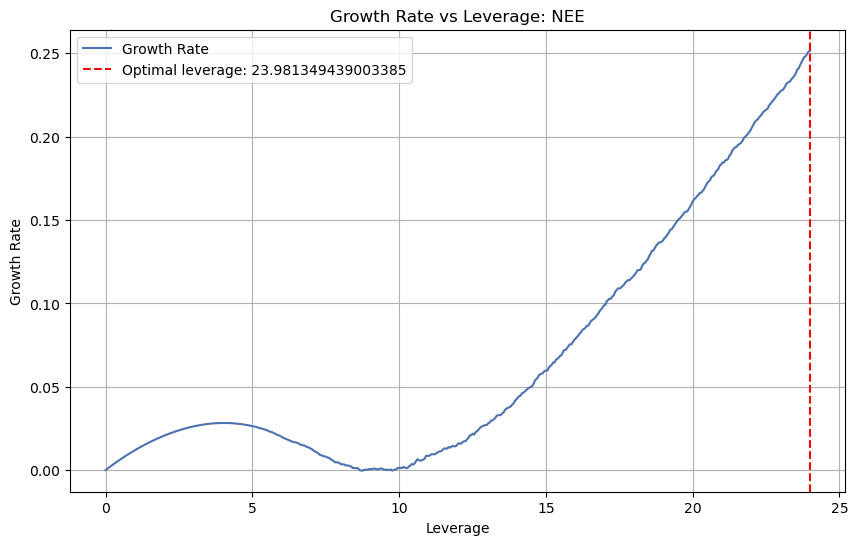

C:\Users\a-spyrosploussiou\AppData\Local\Temp\145\ipykernel_21652\4226197624.py:27: RuntimeWarning: invalid value encountered in log
  array=np.log(1+f*returns)


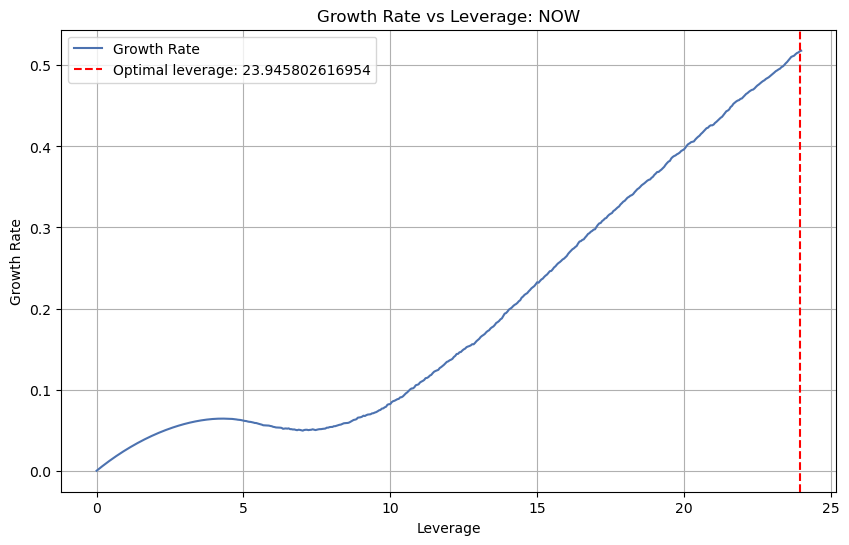

C:\Users\a-spyrosploussiou\AppData\Local\Temp\145\ipykernel_21652\4226197624.py:27: RuntimeWarning: invalid value encountered in log
  array=np.log(1+f*returns)


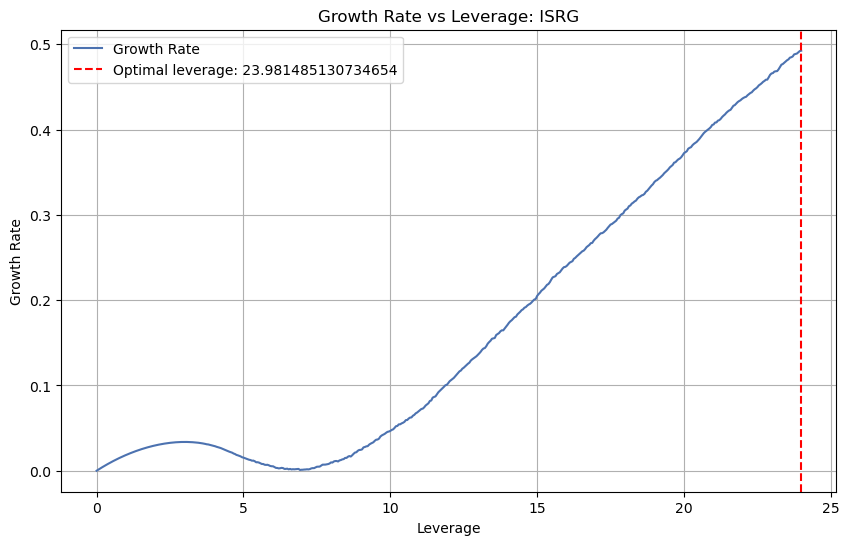

C:\Users\a-spyrosploussiou\AppData\Local\Temp\145\ipykernel_21652\4226197624.py:27: RuntimeWarning: invalid value encountered in log
  array=np.log(1+f*returns)


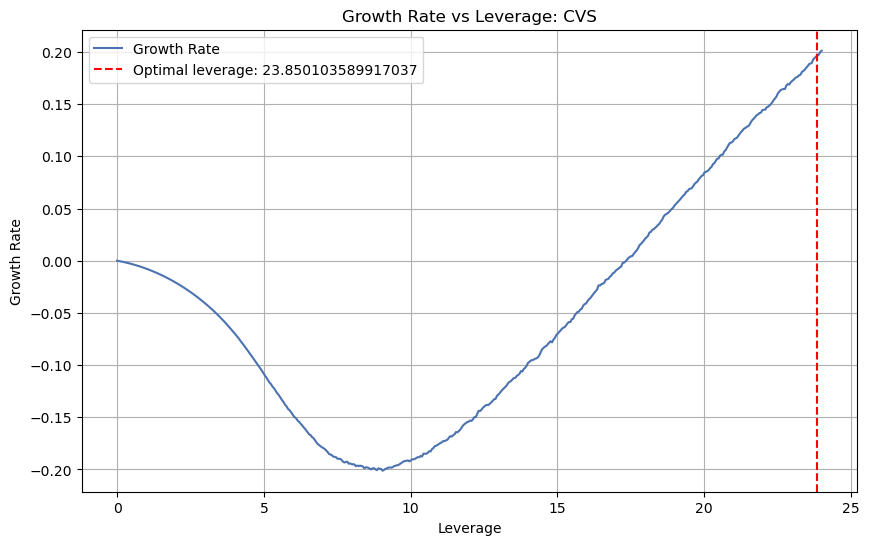

C:\Users\a-spyrosploussiou\AppData\Local\Temp\145\ipykernel_21652\4226197624.py:27: RuntimeWarning: invalid value encountered in log
  array=np.log(1+f*returns)


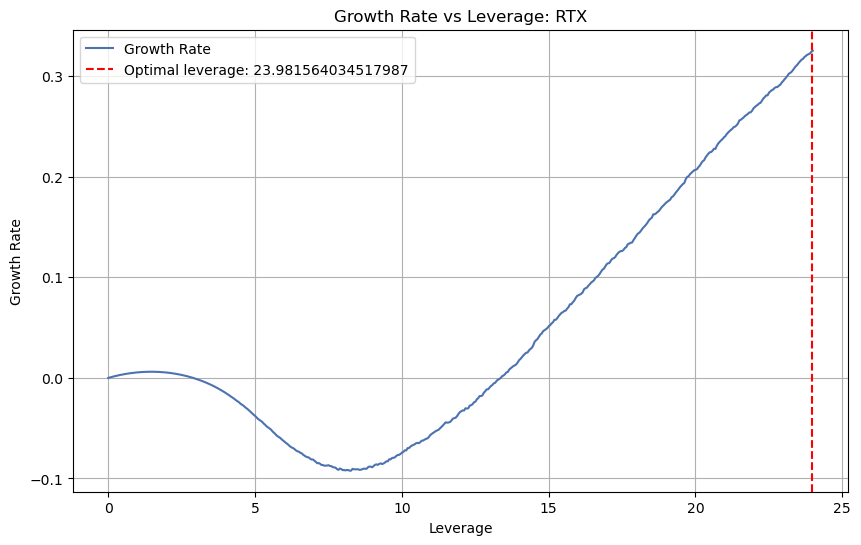

C:\Users\a-spyrosploussiou\AppData\Local\Temp\145\ipykernel_21652\4226197624.py:27: RuntimeWarning: invalid value encountered in log
  array=np.log(1+f*returns)


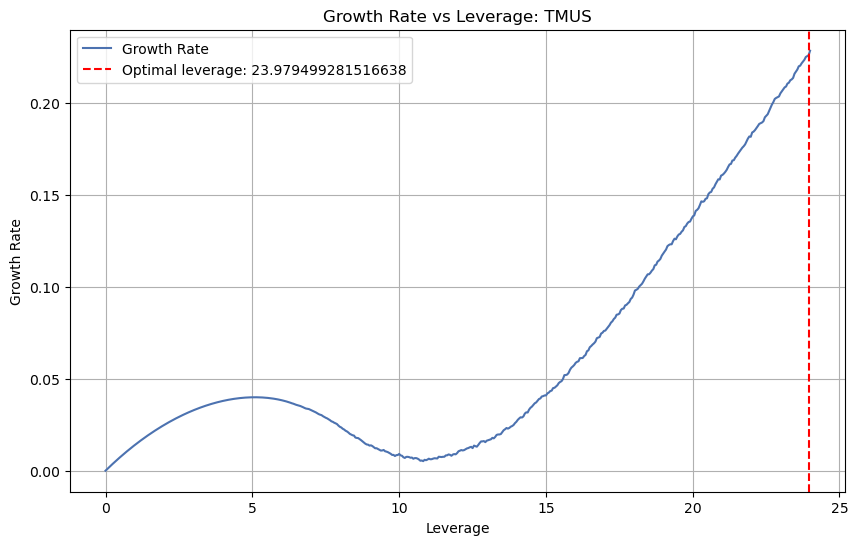

C:\Users\a-spyrosploussiou\AppData\Local\Temp\145\ipykernel_21652\4226197624.py:27: RuntimeWarning: invalid value encountered in log
  array=np.log(1+f*returns)


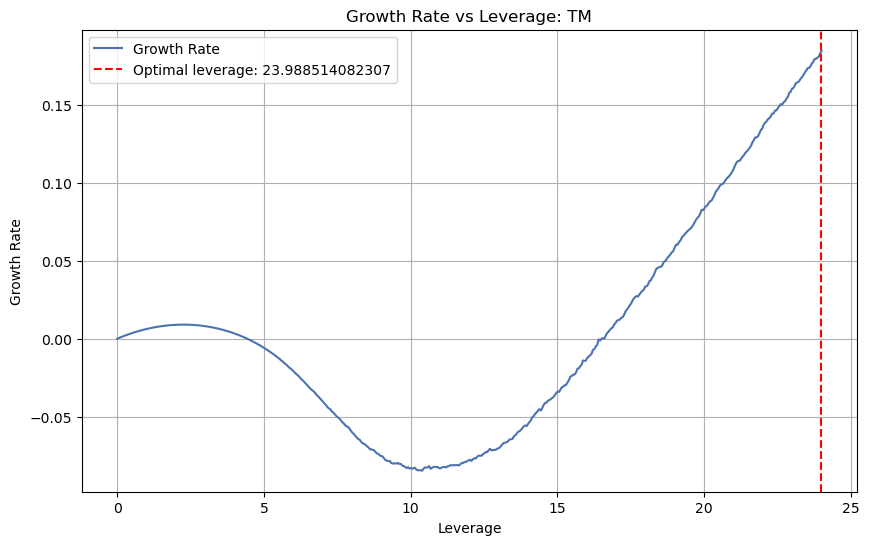

C:\Users\a-spyrosploussiou\AppData\Local\Temp\145\ipykernel_21652\4226197624.py:27: RuntimeWarning: invalid value encountered in log
  array=np.log(1+f*returns)


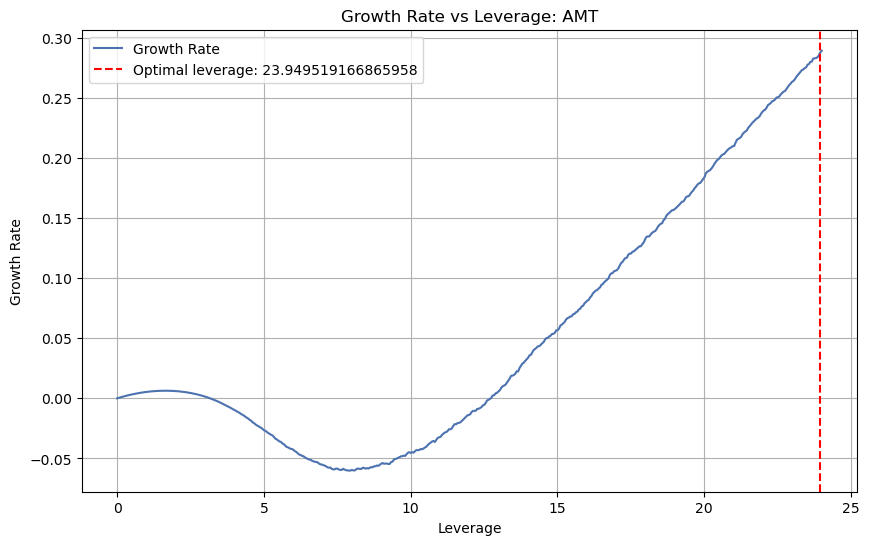

C:\Users\a-spyrosploussiou\AppData\Local\Temp\145\ipykernel_21652\4226197624.py:27: RuntimeWarning: invalid value encountered in log
  array=np.log(1+f*returns)


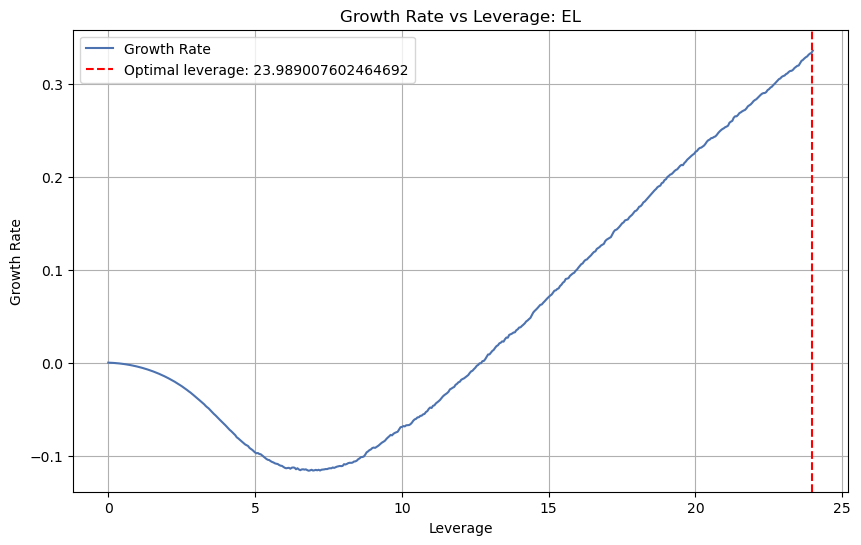

C:\Users\a-spyrosploussiou\AppData\Local\Temp\145\ipykernel_21652\4226197624.py:27: RuntimeWarning: invalid value encountered in log
  array=np.log(1+f*returns)


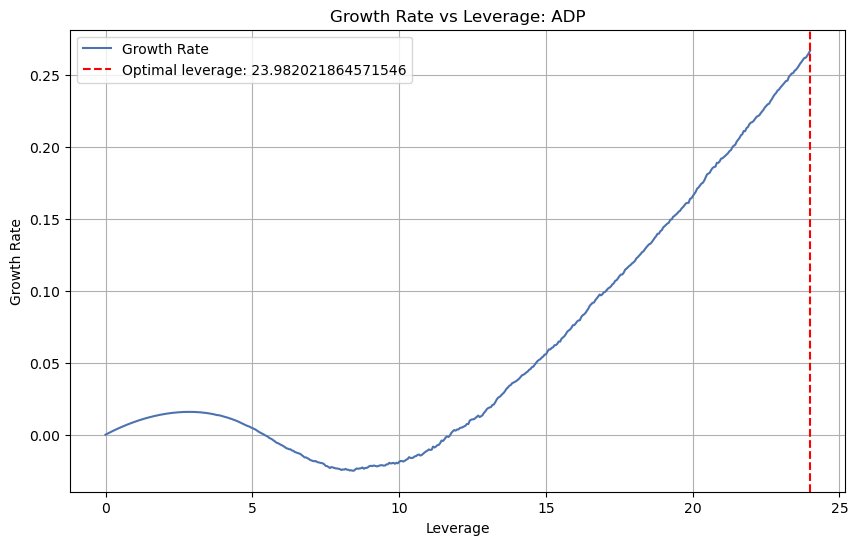

C:\Users\a-spyrosploussiou\AppData\Local\Temp\145\ipykernel_21652\4226197624.py:27: RuntimeWarning: invalid value encountered in log
  array=np.log(1+f*returns)


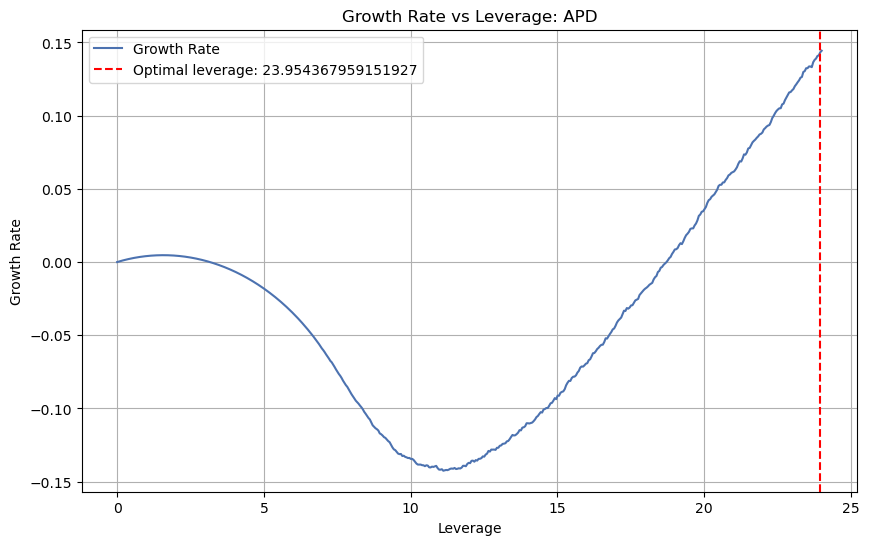

C:\Users\a-spyrosploussiou\AppData\Local\Temp\145\ipykernel_21652\4226197624.py:27: RuntimeWarning: invalid value encountered in log
  array=np.log(1+f*returns)


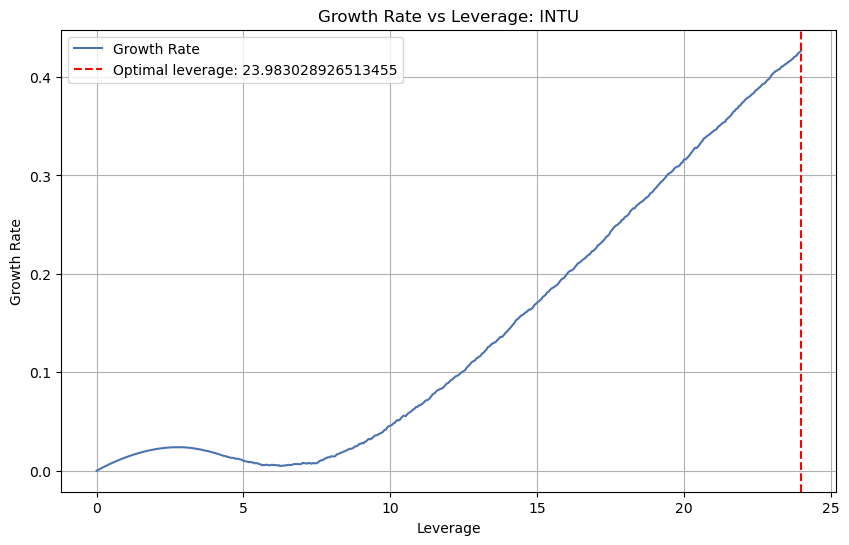

C:\Users\a-spyrosploussiou\AppData\Local\Temp\145\ipykernel_21652\4226197624.py:27: RuntimeWarning: invalid value encountered in log
  array=np.log(1+f*returns)


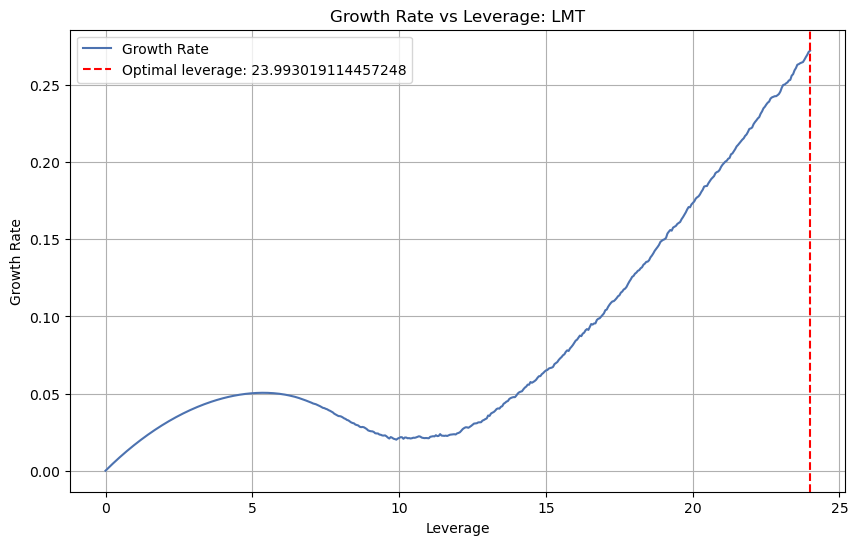

C:\Users\a-spyrosploussiou\AppData\Local\Temp\145\ipykernel_21652\4226197624.py:27: RuntimeWarning: invalid value encountered in log
  array=np.log(1+f*returns)


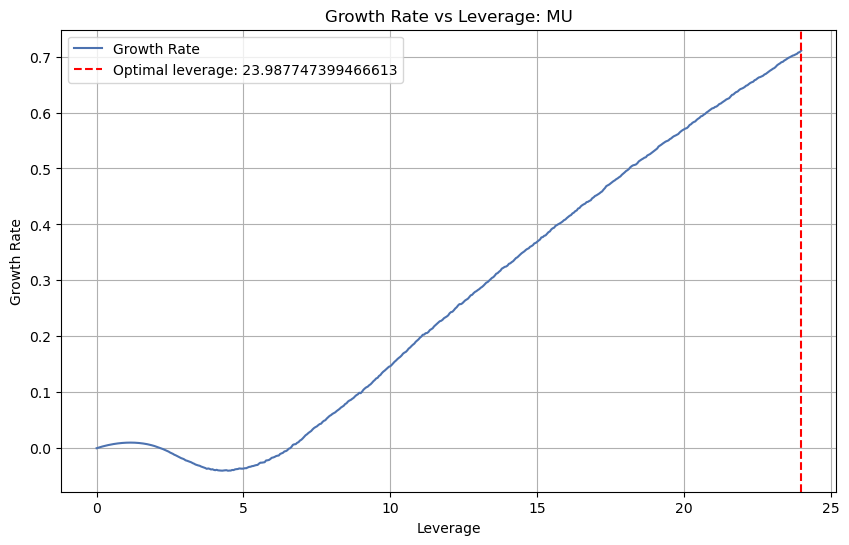

C:\Users\a-spyrosploussiou\AppData\Local\Temp\145\ipykernel_21652\4226197624.py:27: RuntimeWarning: invalid value encountered in log
  array=np.log(1+f*returns)


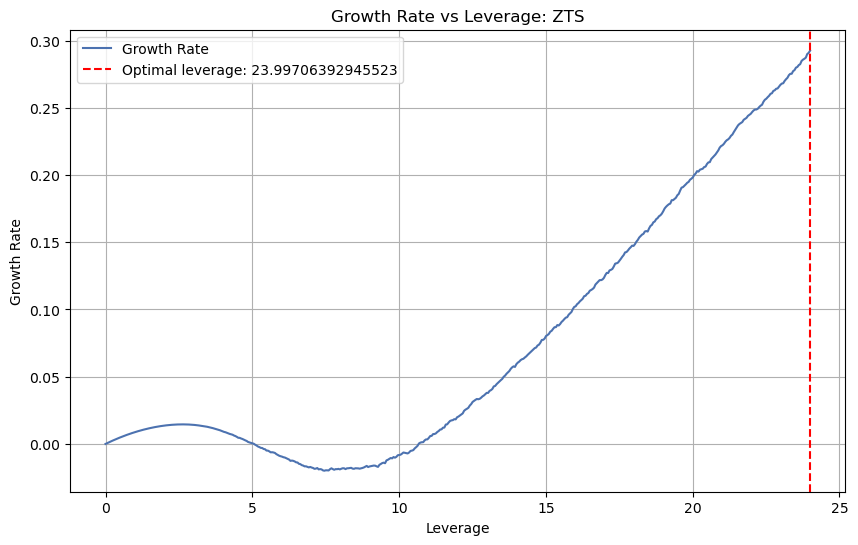

C:\Users\a-spyrosploussiou\AppData\Local\Temp\145\ipykernel_21652\4226197624.py:27: RuntimeWarning: invalid value encountered in log
  array=np.log(1+f*returns)


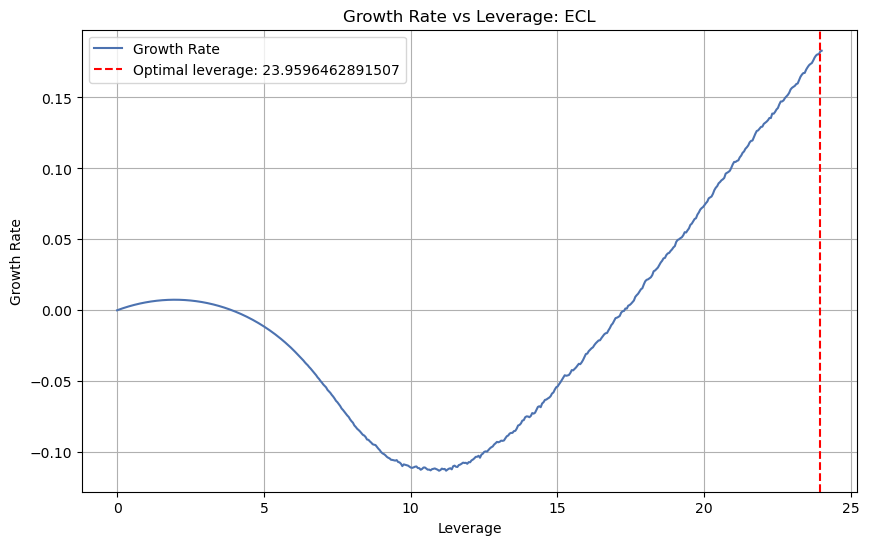

C:\Users\a-spyrosploussiou\AppData\Local\Temp\145\ipykernel_21652\4226197624.py:27: RuntimeWarning: invalid value encountered in log
  array=np.log(1+f*returns)


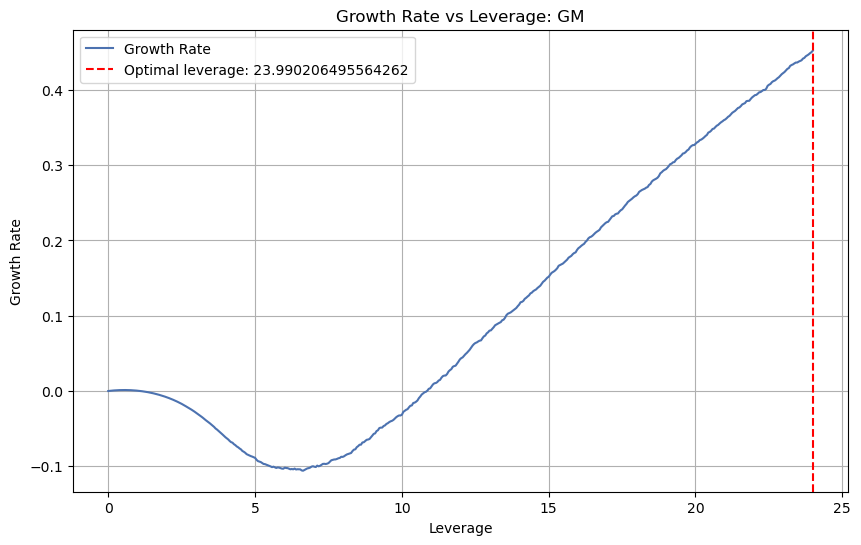

C:\Users\a-spyrosploussiou\AppData\Local\Temp\145\ipykernel_21652\4226197624.py:27: RuntimeWarning: invalid value encountered in log
  array=np.log(1+f*returns)


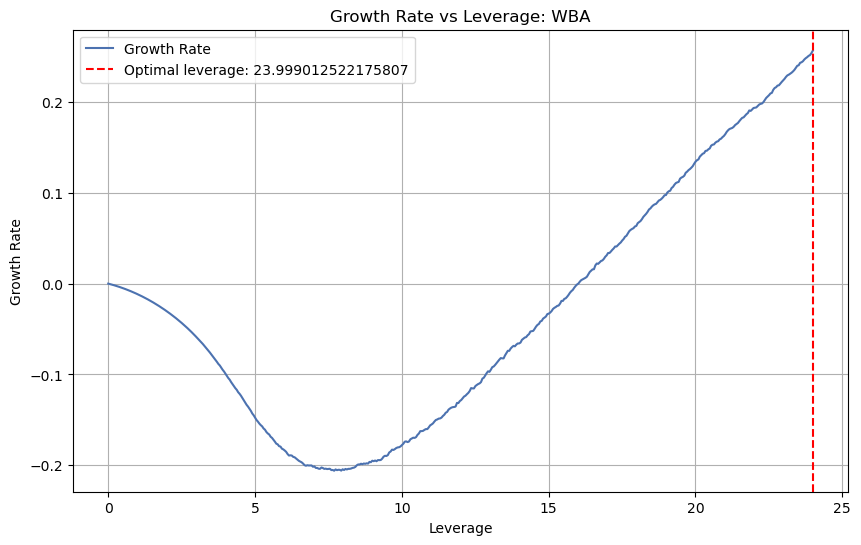

C:\Users\a-spyrosploussiou\AppData\Local\Temp\145\ipykernel_21652\4226197624.py:27: RuntimeWarning: invalid value encountered in log
  array=np.log(1+f*returns)


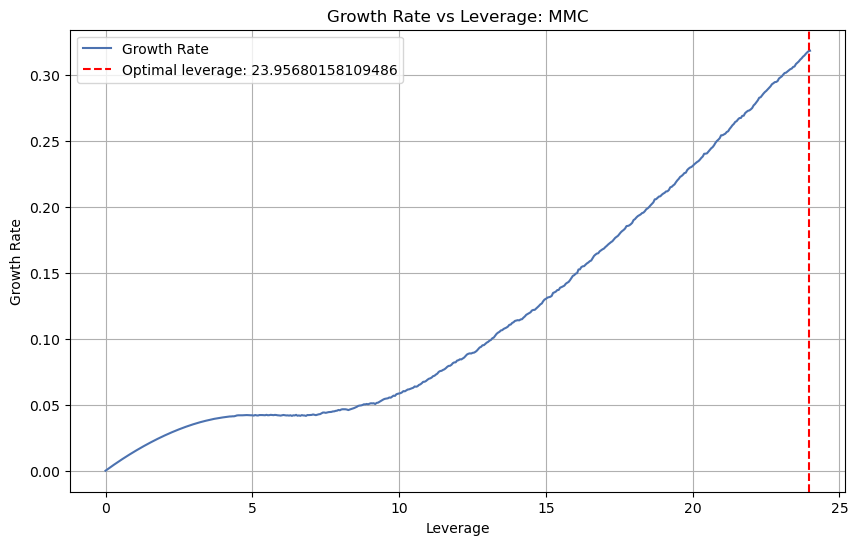

C:\Users\a-spyrosploussiou\AppData\Local\Temp\145\ipykernel_21652\4226197624.py:27: RuntimeWarning: invalid value encountered in log
  array=np.log(1+f*returns)


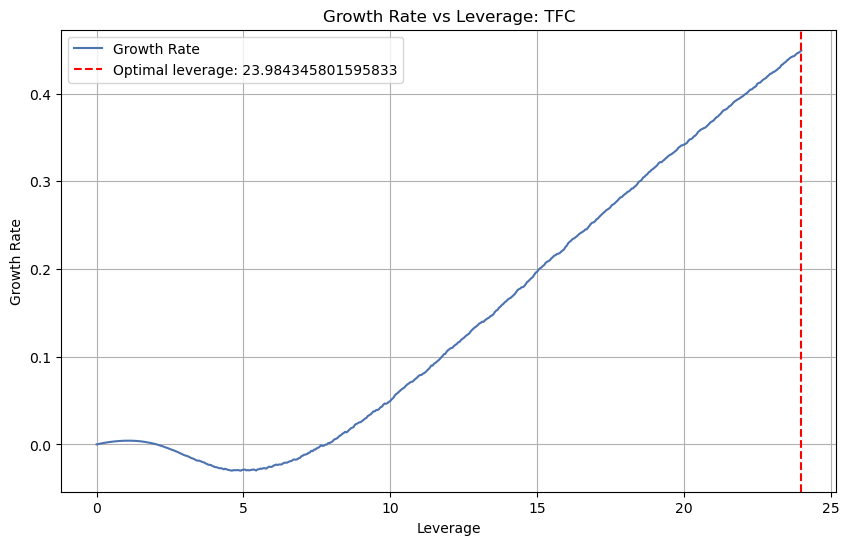

C:\Users\a-spyrosploussiou\AppData\Local\Temp\145\ipykernel_21652\4226197624.py:27: RuntimeWarning: invalid value encountered in log
  array=np.log(1+f*returns)


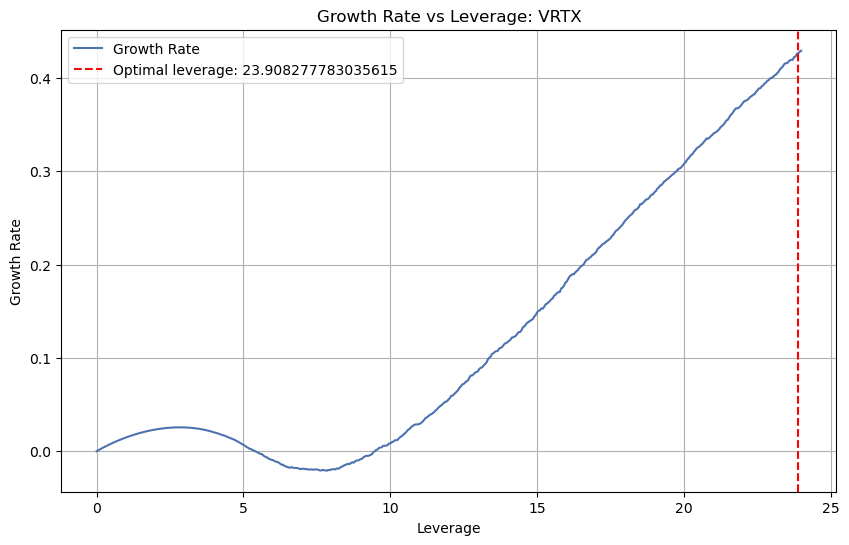

C:\Users\a-spyrosploussiou\AppData\Local\Temp\145\ipykernel_21652\4226197624.py:27: RuntimeWarning: invalid value encountered in log
  array=np.log(1+f*returns)


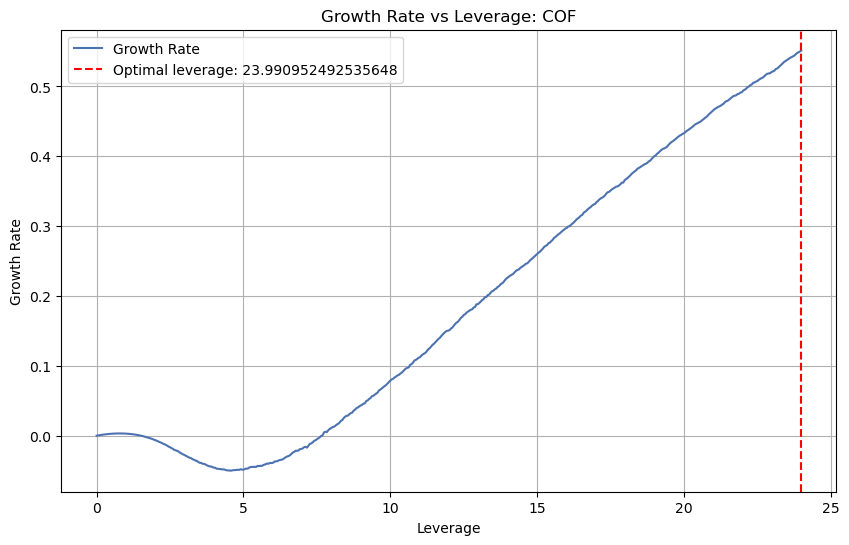

C:\Users\a-spyrosploussiou\AppData\Local\Temp\145\ipykernel_21652\4226197624.py:27: RuntimeWarning: invalid value encountered in log
  array=np.log(1+f*returns)


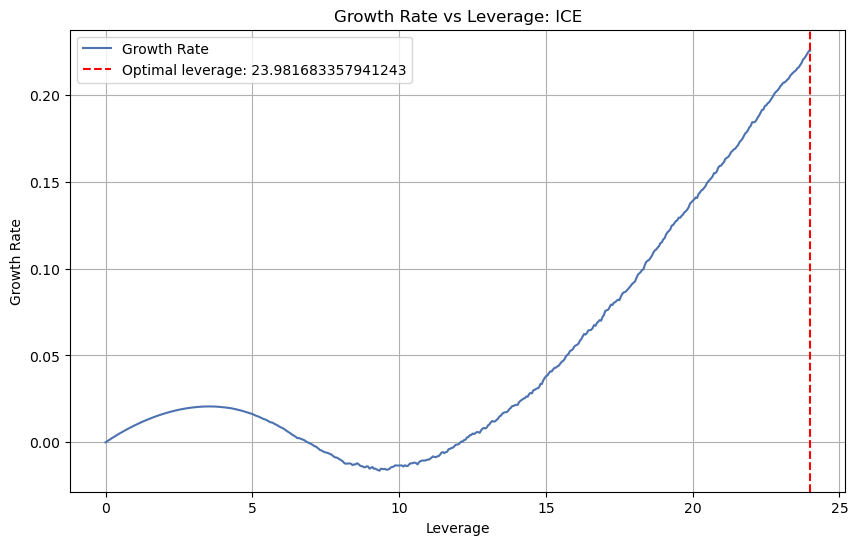

C:\Users\a-spyrosploussiou\AppData\Local\Temp\145\ipykernel_21652\4226197624.py:27: RuntimeWarning: invalid value encountered in log
  array=np.log(1+f*returns)


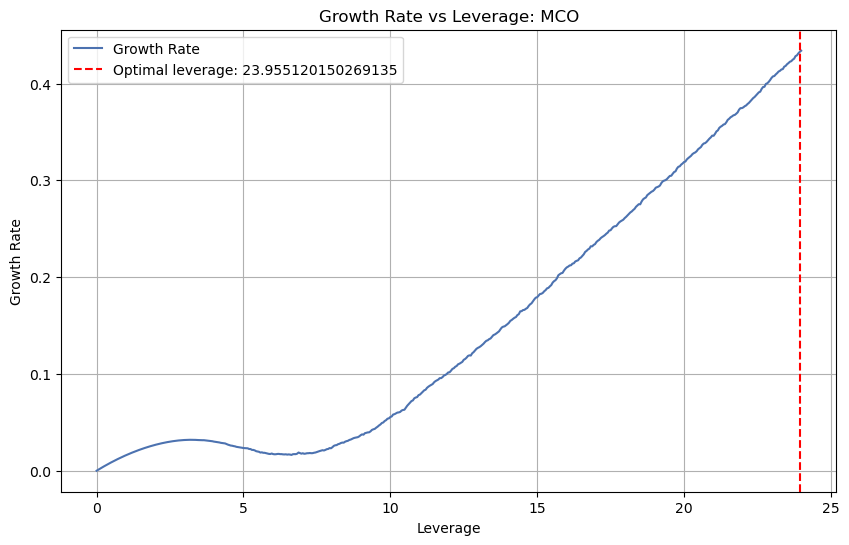

C:\Users\a-spyrosploussiou\AppData\Local\Temp\145\ipykernel_21652\4226197624.py:27: RuntimeWarning: invalid value encountered in log
  array=np.log(1+f*returns)


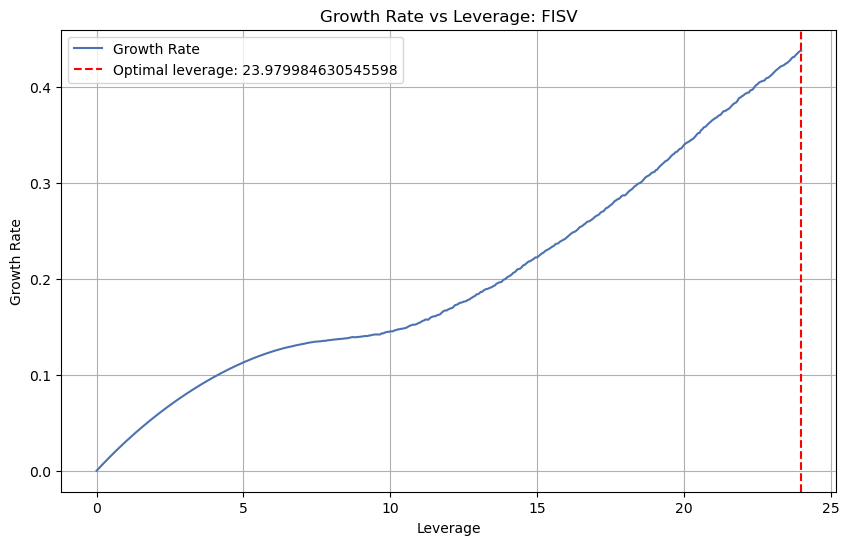

C:\Users\a-spyrosploussiou\AppData\Local\Temp\145\ipykernel_21652\4226197624.py:27: RuntimeWarning: invalid value encountered in log
  array=np.log(1+f*returns)


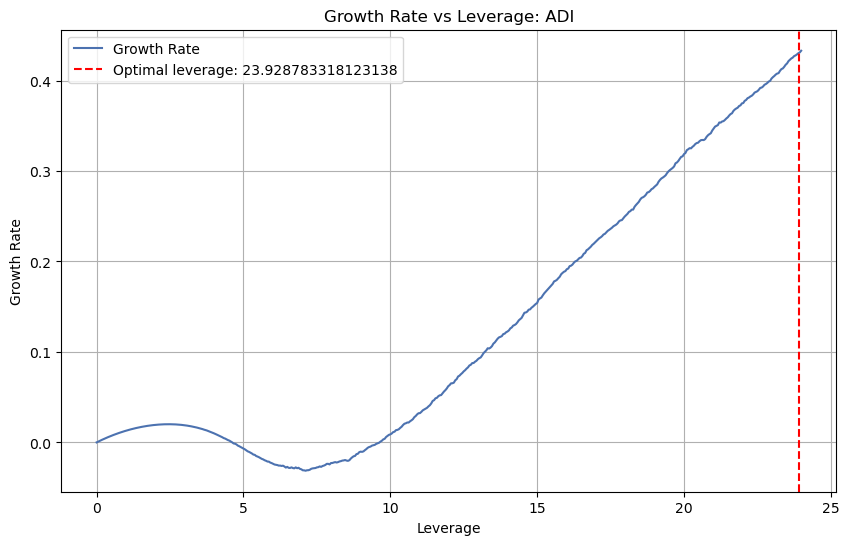

C:\Users\a-spyrosploussiou\AppData\Local\Temp\145\ipykernel_21652\4226197624.py:27: RuntimeWarning: invalid value encountered in log
  array=np.log(1+f*returns)


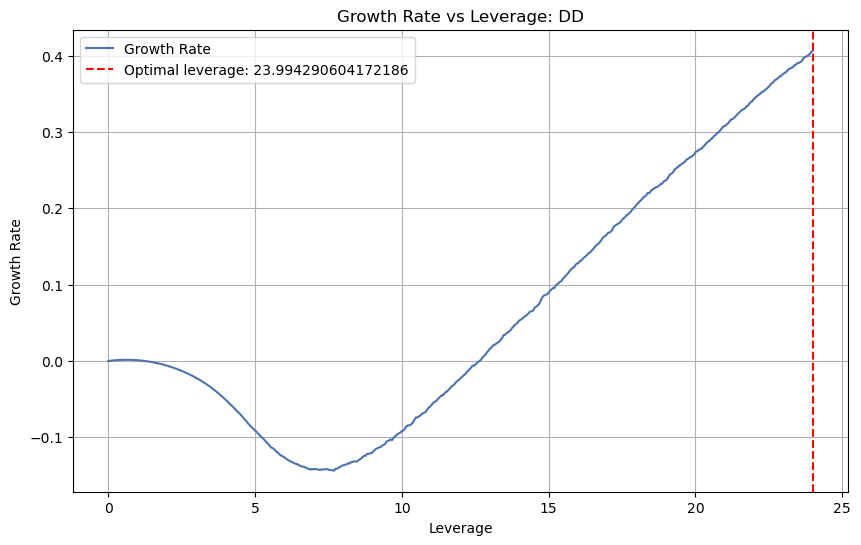

C:\Users\a-spyrosploussiou\AppData\Local\Temp\145\ipykernel_21652\4226197624.py:27: RuntimeWarning: invalid value encountered in log
  array=np.log(1+f*returns)


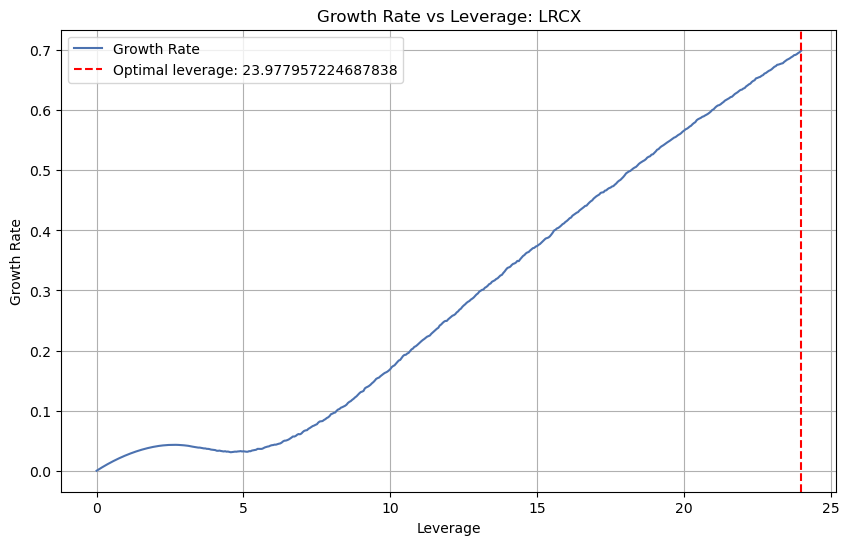

C:\Users\a-spyrosploussiou\AppData\Local\Temp\145\ipykernel_21652\4226197624.py:27: RuntimeWarning: invalid value encountered in log
  array=np.log(1+f*returns)


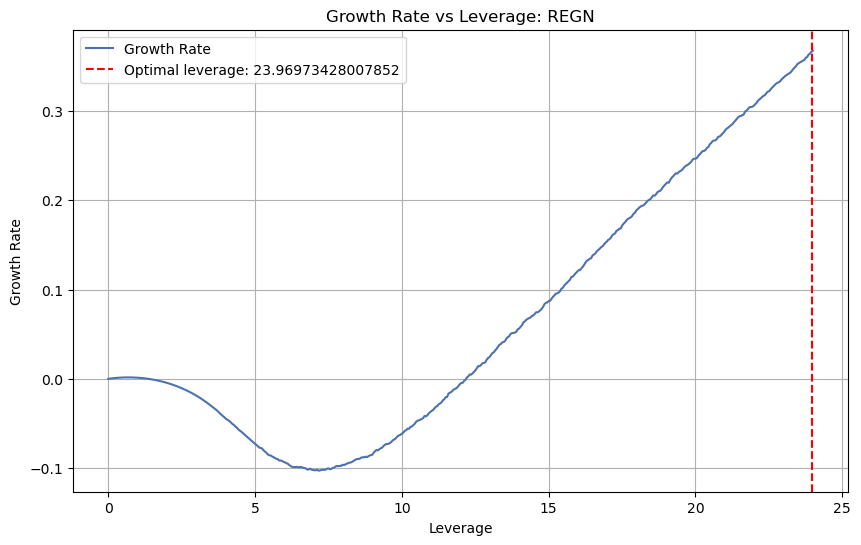

C:\Users\a-spyrosploussiou\AppData\Local\Temp\145\ipykernel_21652\4226197624.py:27: RuntimeWarning: invalid value encountered in log
  array=np.log(1+f*returns)


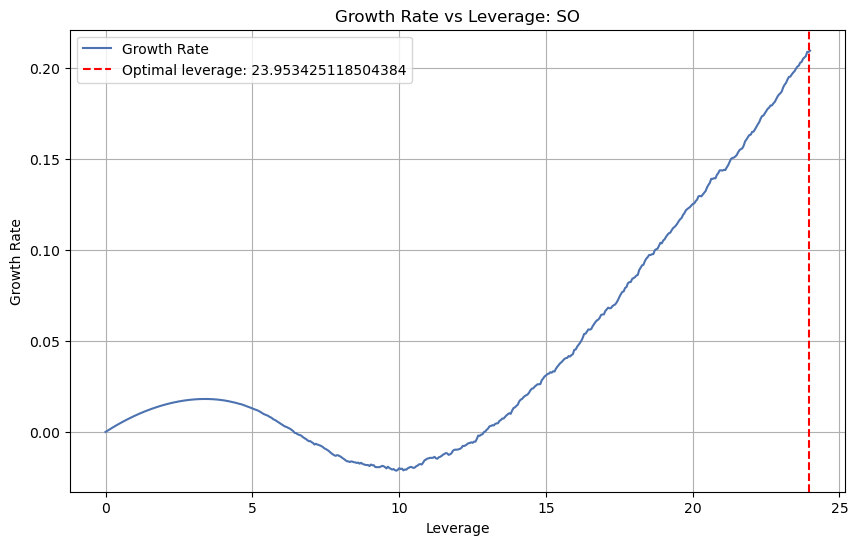

C:\Users\a-spyrosploussiou\AppData\Local\Temp\145\ipykernel_21652\4226197624.py:27: RuntimeWarning: invalid value encountered in log
  array=np.log(1+f*returns)


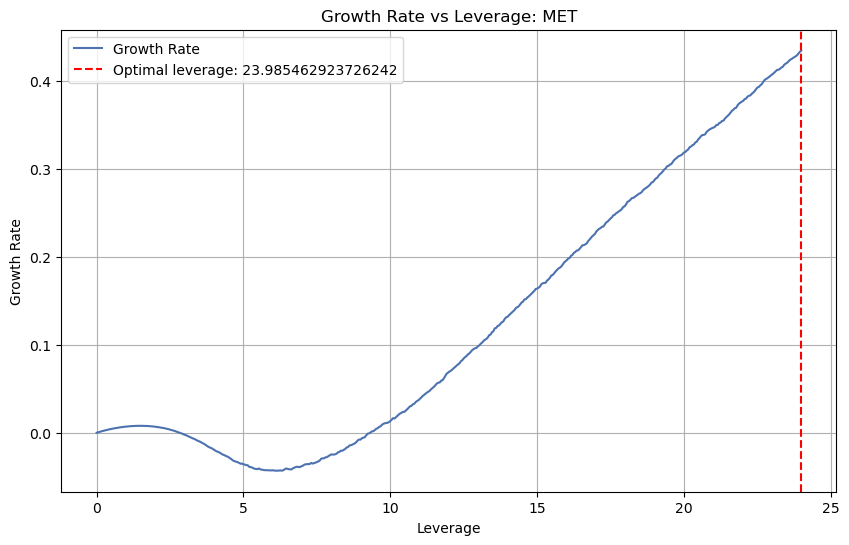

In [3]:
'''
tickers = ['AAP', 'ABBV', 'ABMD', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADSK', 'AEE', 'AEP', 'AES', 'AFL', 'AIG', 'AIV', 'AIZ', 
           'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK', 'ALL', 'ALLE', 'AMCR', 'AMD', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT',
             'ANET', 'ANSS', 'AON', 'AOS', 'APA', 'APD', 'APH', 'APTV', 'ARE', 'ATO', 'AVB', 'AVGO', 'AVY', 'AWK', 
             'AXP', 'AZO', 'BA', 'BAX', 'BBY', 'BDX', 'BEN', 'BIIB', 'BIO', 'BK', 'BKR', 'BLK', 'BR', 'BSX', 
             'BWA', 'BXP', 'C', 'CAG', 'CAH', 'CARR', 'CAT', 'CB', 'CBOE', 'CBRE', 'CCI', 'CCL', 'CDNS', 'CDW', 'CE', 'CF', 'CFG', 'CHD',
               'CHRW', 'CHTR', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COO', 'COP', 'CPB', 
               'CPRT', 'CRM', 'CSCO', 'CSX', 'CTAS', 'CTLT', 'CTSH', 'CTVA', 'CVS', 'CVX', 'D', 'DAL', 'DD', 'DE', 'DFS', 'DG', 'DGX', 'DHI', 'DHR', 
               'DIS', 'DISCK', 'DISH', 'DLR', 'DLTR', 'DOV', 'DOW', 'DPZ', 'DRE', 'DRI', 'DTE', 'DUK', 'DVA', 'DVN', 'DXCM', 'DXC', 'EA', 'EBAY', 'ECL', 'ED', 
               'EFX', 'EIX', 'EL', 'EMN', 'EMR', 'EOG', 'EQIX', 'EQR', 'ES', 'ESS', 'ETN', 'ETR', 'ETSY', 'EVRG', 'EW', 'EXC', 'EXPD', 'EXPE', 'EXR', 'F', 'FANG', 'FAST', 'FB',
                 'FBHS', 'FCX', 'FDX', 'FE', 'FFIV', 'FIS', 'FISV', 'FITB', 'FLIR', 'FLS', 'FLT', 'FMC', 'FOX', 'FOXA', 'FRC', 'FRT', 'FTI', 'FTNT', 'FTV', 'GD', 'GE', 'GILD', 'GIS', 
                 'GL', 'GLW', 'GM', 'GNRC', 'GOOGL', 'GPC', 'GPN', 'GPS', 'GRMN', 'GS', 'GWW', 'HAL', 'HAS', 'HBAN', 'HBI', 'HCA', 'HD', 'HES', 'HIG', 'HII', 'HLT', 'HOLX', 'HON', 'HPE', 'HPQ', 
                 'HRL', 'HSIC', 'HST', 'HSY', 'HUM', 'HWM', 'IBM', 'ICE', 'IDXX', 'IEX', 'IFF', 'ILMN', 'INCY', 'INFO', 'INTC', 'INTU', 'IP', 'IPG', 'IPGP', 'IQV', 'IR', 'IRM', 'ISRG', 'IT', 'ITW', 'IVZ', 
                 'J', 'JBHT', 'JCI', 'JKHY', 'JNJ', 'JNPR', 'JPM', 'K', 'KEY', 'KEYS', 'KHC', 'KIM', 'KLAC', 'KMB', 'KMI', 'KMX', 'KO', 'KR', 'KSU', 'L', 'LB', 'LDOS', 'LEG', 'LEN', 'LH', 'LHX', 'LIN', 'LKQ', 'LLY',
                   'LMT', 'LNC', 'LNT', 'LOW', 'LRCX', 'LUV', 'LVS', 'LW', 'LYB', 'LYV', 'MA', 'MAA', 'MAR', 'MAS', 'MCD', 'MCHP', 'MCK', 'MCO', 'MDLZ', 'MDT', 'MET', 'MGM', 'MHK', 'MKC', 'MKTX', 'MLM', 'MMC', 'MMM', 
                   'MNST', 'MO', 'MOS', 'MPC', 'MRK', 'MRO', 'MS', 'MSCI', 'MSFT', 'MSI', 'MTB', 'MTD', 'MU', 'MXIM', 'NCLH', 'NDAQ', 'NEE', 'NEM', 'NFLX', 'NI', 'NKE', 'NLOK', 'NLSN', 'NOC', 'NOV', 'NOW', 'NRG', 'NSC', 
                   'NTAP', 'NTRS', 'NUE', 'NVDA', 'NVR', 'NWL', 'NWS', 'NWSA', 'O', 'ODFL', 'OKE', 'OMC', 'ORCL', 'ORLY', 'OTIS', 'OXY', 'PAYC', 'PAYX', 'PBCT', 'PCAR', 'PEAK', 'PEG', 'PEP', 'PFE', 'PFG', 'PG', 'PGR', 'PH',
                     'PHM', 'PKG', 'PKI', 'PLD', 'PM', 'PNC', 'PNR', 'PNW', 'POOL', 'PPG', 'PPL', 'PRGO', 'PRU', 'PSA', 'PSX', 'PVH', 'PWR', 'PXD', 'PYPL', 'QCOM', 'QRVO', 'RCL', 'RE', 'REG', 'REGN', 'RF', 'RHI', 'RJF', 'RL', 
                     'RMD', 'ROK', 'ROL', 'ROP', 'ROST', 'RSG', 'RTX', 'SBAC', 'SBUX', 'SCHW', 'SEE', 'SHW', 'SIVB', 'SJM', 'SNA', 'SNPS', 'SO', 'SPG', 'SPGI', 'SRE', 'STE', 'STT', 'STX', 'STZ', 'SWK', 'SWKS', 'SYF', 'SYK', 'SYY', 'T', 'TAP',
                       'TDG', 'TDY', 'TEL', 'TER', 'TFC', 'TFX', 'TGT', 'TIF', 'TJX', 'TMO', 'TMUS', 'TPR', 'TRMB', 'TROW', 'TRV', 'TSCO', 'TSLA', 'TSN', 'TT', 'TTWO', 'TWTR', 'TXN', 'TXT', 'TYL', 'UA', 'UAA', 'UAL', 'UDR', 'UHS', 'ULTA', 'UNH', 
                       'UNM', 'UNP', 'UPS', 'URI', 'USB', 'V', 'VFC', 'VIAC', 'VLO', 'VMC', 'VNO', 'VRSK', 'VRSN', 'VRTX', 'VTR', 'VTRS', 'VZ', 'WAB', 'WAT', 'WBA', 'WDC', 'WEC', 'WELL', 'WFC', 'WHR', 'WLTW', 'WM', 'WMB', 'WMT', 'WRB', 'WRK', 
                       'WST', 'WU', 'WY', 'WYNN', 'XEL', 'XLNX', 'XOM', 'XRAY', 'XRX', 'XYL', 'YUM', 'ZBH', 'ZBRA', 'ZION', 'ZTS', 'LMT', 'LNC', 'LNT', 'LOW', 'LRCX', 'LUV', 'LVS', 'LW', 'LYB', 'LYV', 'MA', 'MAA', 'MAR', 'MAS', 'MCD', 'MCHP', 'MCK', 'MCO', 'MDLZ', 'MDT', 'MET', 'MGM', 'MHK', 'MKC', 'MKTX', 'MLM', 'MMC', 'MMM', 
                   'MNST', 'MO', 'MOS', 'MPC', 'MRK', 'MRO', 'MS', 'MSCI', 'MSFT', 'MSI', 'MTB', 'MTD', 'MU', 'NCLH', 'NDAQ', 'NEE', 'NEM', 'NFLX', 'NI', 'NKE','NOC', 'NOV', 'NOW', 'NRG', 'NSC', 
                   'NTAP', 'NTRS', 'NUE', 'NVDA', 'NVR', 'NWL', 'NWS', 'NWSA', 'O', 'ODFL', 'OKE', 'OMC', 'ORCL', 'ORLY', 'OTIS', 'OXY', 'PAYC', 'PAYX', 'PCAR', 'PEG', 'PEP', 'PFE', 'PFG', 'PG', 'PGR', 'PH',
                     'PHM', 'PKG', 'PHM', 'PKG', 'PLD', 'PM', 'PNC', 'PNR', 'PNW', 'POOL', 'PPG', 'PPL', 'PRGO', 'PRU', 'PSA', 'PSX', 'PVH', 'PWR', 'PXD', 'PYPL', 'QCOM', 'QRVO', 'RCL' ]
'''
tickers = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'TSLA', 'JPM', 'PG', 'MA', 'NVDA','INTC',
             'NFLX', 'XOM', 'ABT', 'NKE',
            'TMO', 'ADBE', 'CSCO', 'PYPL', 'MCD', 'IBM', 'QCOM', 'COST', 'AVGO', 'ACN',
            'TXN',
            'COP', 'MO', 'CAT', 'FIS', 'C', 'CME', 'DHR', 'SPGI', 'LOW', 'FDX', 'NEE', 'NOW',
            'ISRG', 'CVS', 'RTX', 'TMUS', 'TM', 'AMT', 'EL', 'ADP', 'APD', 'INTU', 'LMT', 'MU', 'ZTS', 
            'ECL', 'GM', 'WBA', 'MMC', 'TFC', 'VRTX', 'COF', 'ICE', 'MCO', 'FISV', 'ADI', 'DD', 'LRCX', 
            'REGN', 'SO', 'MET']


for ticker in tickers:
    simulated_returns, optimal_leverage = simulated(stock_take(ticker))
    plot_growth(simulated_returns, optimal_leverage, ticker)

In [4]:
def stock_data(tickers):
    stock_data = {}
    for ticker in tickers:
        stock_data[ticker] = yf.Ticker(ticker).history(period='15y')['Close']
        df = pd.DataFrame(stock_data)
    return df



def stats(data):
    sample_cov = risk_models.sample_cov(data, frequency=252)
    S = risk_models.CovarianceShrinkage(data).ledoit_wolf()
    mu = expected_returns.capm_return(data)  
    mu.plot.barh(figsize=(10,16))
    plotting.plot_covariance(S, plot_correlation=True)
    return S, mu



def weight(S, mu):
    ef=EfficientFrontier(mu,S)
    weights = ef.max_sharpe()
    cleaned_weights = ef.clean_weights()
    print(dict(cleaned_weights))
    ef.portfolio_performance(verbose = True)
    return weights



def allocation(data, weights):
    latest_prices = get_latest_prices(data)
    da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 100000)
    allocation, leftover = da.greedy_portfolio()
    print('Discrete allocation:', allocation)
    print('Funds remaining: \u00A3{:.2f}'.format(leftover))



def simulate(S, mu):
    n_samples = 10000000
    w = np.random.dirichlet(np.ones(len(mu)), n_samples)
    rets = w.dot(mu)
    stds = np.sqrt((w.T*(S @ w.T)).sum(axis=0))
    sharpes = rets/stds
    print('sample portfolio returns:', rets)
    print('sample portfolio volatilities:', stds)
    return rets, stds, sharpes



def plot_eff_front(S, mu, rets, stds, sharpes, tickers):
    ef=EfficientFrontier(mu, S)
    fig, ax = plt.subplots(figsize=(10,10))
    plotting.plot_efficient_frontier(ef, ax= ax, show_assets = False)
    ef2 = EfficientFrontier(mu, S)
    ef2.max_sharpe()
    ret_tangent, std_tangent,_=ef2.portfolio_performance()
    ax.scatter(stds,rets, marker='.', c=sharpes, cmap = 'viridis_r')
    ax.scatter(std_tangent, ret_tangent, c='red', marker='X', s=150, label='Max sharpe')
    ax.set_title(f'Efficient frontier with random portfolios')
    ax.legend()
    plt.tight_layout()
    plt.show()

{'AAPL': 0.00105, 'MSFT': 0.0, 'AMZN': 0.0, 'GOOGL': 0.0, 'TSLA': 0.00145, 'JPM': 0.00093, 'PG': 0.0, 'MA': 0.0, 'NVDA': 0.0, 'INTC': 0.00172, 'NFLX': 0.0, 'XOM': 0.01062, 'ABT': 0.0, 'NKE': 0.0, 'TMO': 0.0, 'ADBE': 0.0, 'CSCO': 0.00831, 'PYPL': 0.06019, 'MCD': 0.0, 'IBM': 0.0, 'QCOM': 0.00033, 'COST': 0.00165, 'AVGO': 0.0, 'ACN': 0.0, 'TXN': 0.0, 'COP': 0.00129, 'MO': 0.00119, 'CAT': 0.0, 'FIS': 0.0, 'C': 0.00014, 'CME': 0.01564, 'DHR': 0.0, 'SPGI': 0.0, 'LOW': 0.0, 'FDX': 0.00101, 'NEE': 0.0, 'NOW': 0.00773, 'ISRG': 0.0, 'CVS': 0.0, 'RTX': 0.00032, 'TMUS': 0.00419, 'TM': 0.00147, 'AMT': 0.0, 'EL': 0.0, 'ADP': 0.0, 'APD': 0.0, 'INTU': 0.0, 'LMT': 0.0107, 'MU': 0.00637, 'ZTS': 0.02543, 'ECL': 0.0, 'GM': 0.00776, 'WBA': 0.00577, 'MMC': 0.00481, 'TFC': 0.0, 'VRTX': 0.00278, 'COF': 0.0, 'ICE': 0.0, 'MCO': 0.0, 'FISV': 0.78243, 'ADI': 0.0, 'DD': 0.01407, 'LRCX': 0.0, 'REGN': 0.00592, 'SO': 0.00353, 'MET': 0.01122}
Expected annual return: 11.3%
Annual volatility: 5.8%
Sharpe Ratio: 1.60
Dis

c:\Users\a-spyrosploussiou\AppData\Local\anaconda3_\lib\site-packages\cvxpy\problems\problem.py:1407: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


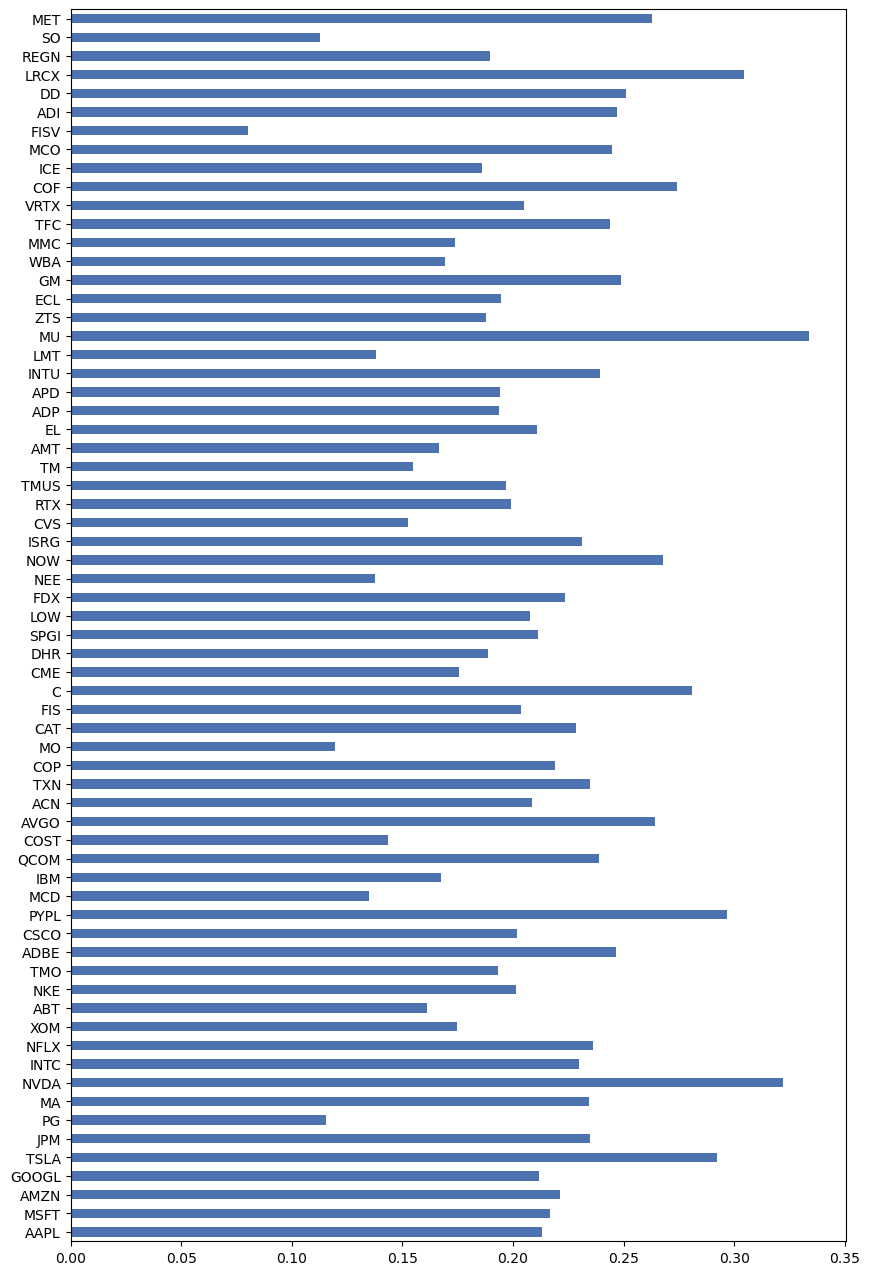

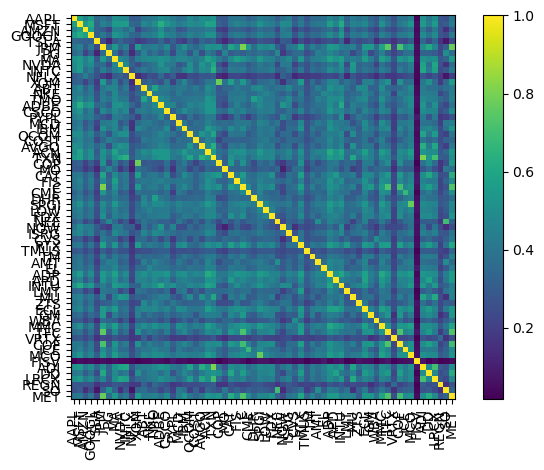

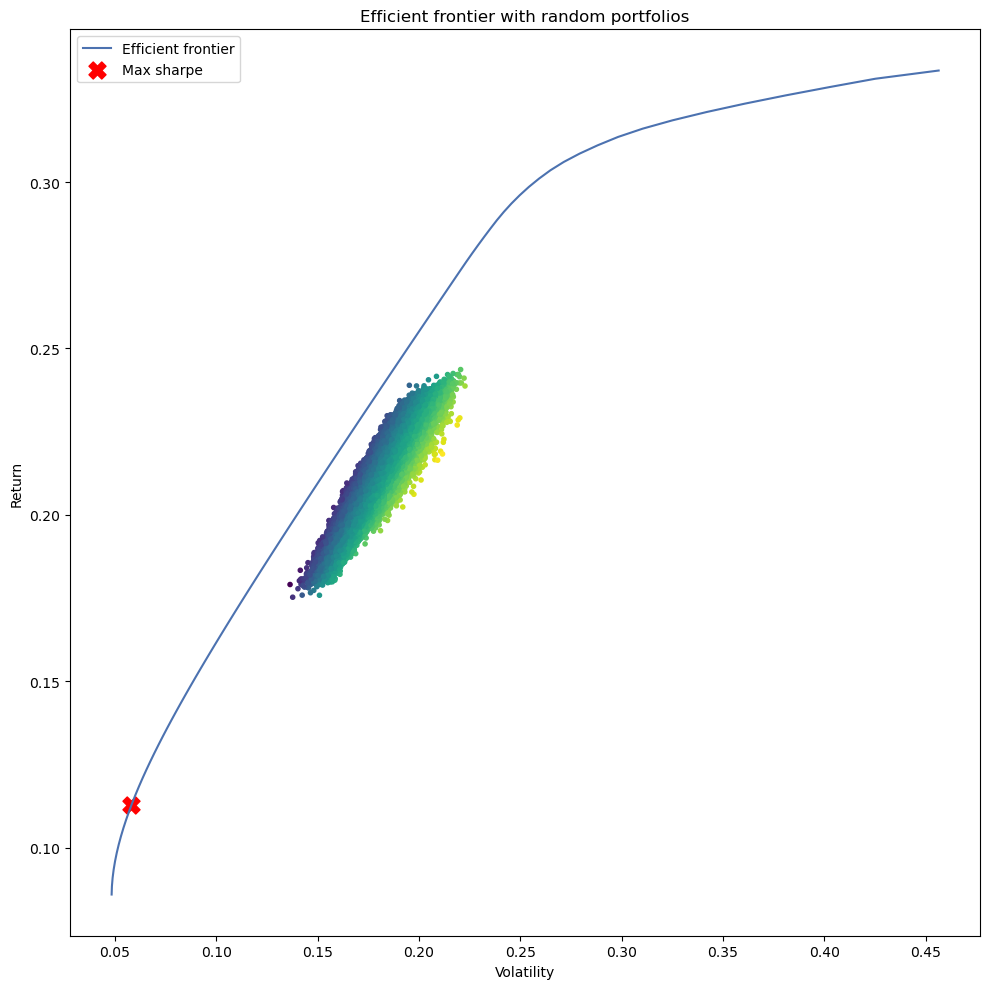

In [5]:

tickers = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'TSLA', 'JPM', 'PG', 'MA', 'NVDA','INTC',
             'NFLX', 'XOM', 'ABT', 'NKE',
            'TMO', 'ADBE', 'CSCO', 'PYPL', 'MCD', 'IBM', 'QCOM', 'COST', 'AVGO', 'ACN',
            'TXN',
            'COP', 'MO', 'CAT', 'FIS', 'C', 'CME', 'DHR', 'SPGI', 'LOW', 'FDX', 'NEE', 'NOW',
            'ISRG', 'CVS', 'RTX', 'TMUS', 'TM', 'AMT', 'EL', 'ADP', 'APD', 'INTU', 'LMT', 'MU', 'ZTS', 
            'ECL', 'GM', 'WBA', 'MMC', 'TFC', 'VRTX', 'COF', 'ICE', 'MCO', 'FISV', 'ADI', 'DD', 'LRCX', 
            'REGN', 'SO', 'MET']


data = stock_data(tickers)
S, mu = stats(data)
weights= weight(S, mu)
allocation(data, weights)
rets, stds, sharpes=simulate(S, mu)
plot_eff_front(S, mu, rets, stds, sharpes, tickers)